# Linear Regression 6133 Тюгаев Никита Павлович

## 1. Считать в `pandas.DataFrame` датасет automobile из ucimlrepo

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from ucimlrepo import fetch_ucirepo

# Настройка отображения графиков
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set(font_scale=1.2)

# Отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загружаем датасет automobile из ucimlrepo
automobile = fetch_ucirepo(id=10)

# Получаем данные и метаданные
X = automobile.data.features
y = automobile.data.targets
metadata = automobile.metadata
variable_info = automobile.variables

# Объединяем признаки и целевую переменную в один датафрейм
df = pd.concat([X, y], axis=1)

# Выводим информацию о датасете
print(f"Название датасета: {metadata['name']}")
print(f"Количество наблюдений: {metadata['num_instances']}")
print(f"Количество признаков: {metadata['num_features']}")
print(f"Целевая переменная: price")

# Выводим первые 5 строк датафрейма
df.head()

Название датасета: Automobile
Количество наблюдений: 205
Количество признаков: 25
Целевая переменная: price


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


## 2. Датасет и подготовка данных, этап 1

### 2.1 Привести описание датасета

In [5]:
# Статистическое описание числовых признаков
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


In [ ]:
# Получаем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
# Получаем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
# Получаем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

### 2.2 Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные"

In [6]:
# Проверяем наличие пропущенных значений
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# Проверяем наличие значений '?' (часто используется в UCI датасетах вместо NaN)
for col in df.columns:
    if df[col].dtype == 'object':
        if (df[col] == '?').any():
            print(f"Столбец {col} содержит значения '?': {(df[col] == '?').sum()}")

Количество пропущенных значений в каждом столбце:
price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64


In [7]:
# Заменяем значения '?' на NaN
df_clean = df.replace('?', np.nan)

# Преобразуем столбцы с числовыми данными из строкового типа в числовой
numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Проверяем наличие пропущенных значений после преобразования
print("Количество пропущенных значений после преобразования:")
print(df_clean.isnull().sum())

Количество пропущенных значений после преобразования:
price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64


In [8]:
# Заменяем пропущенные значения
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Для числовых признаков используем медиану
for col in numerical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
# Для категориальных признаков используем наиболее частое значение
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    
print(f"Размер датафрейма после заполнения пропущенных значений: {df_clean.shape}")


Размер датафрейма после заполнения пропущенных значений: (205, 26)


In [9]:
numerical_cols.remove('price')  # Удаляем целевую переменную из списка числовых признаков

print("Категориальные признаки:")
print(categorical_cols)
print("\nЧисловые признаки:")
print(numerical_cols)
print("\nЦелевая переменная: price")

Категориальные признаки:
['fuel-system', 'engine-type', 'engine-location', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make']

Числовые признаки:
['highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'engine-size', 'num-of-cylinders', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'num-of-doors', 'normalized-losses', 'symboling']

Целевая переменная: price


### 2.3 Нормализовать численные данные

In [10]:
# Создаем копию датафрейма для нормализации
df_normalized = df_clean.copy()

# Создаем объект StandardScaler
scaler = StandardScaler()

# Нормализуем числовые признаки
df_normalized[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Выводим первые 5 строк нормализованного датафрейма
df_normalized.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,-0.546059,-0.646553,-0.264983,0.173309,-0.288349,-1.841345,0.520489,mpfi,0.074449,...,-1.690772,front,rwd,convertible,-1.141653,std,gas,alfa-romero,-0.176503,1.743470
1,16500.0,-0.546059,-0.646553,-0.264983,0.173309,-0.288349,-1.841345,0.520489,mpfi,0.074449,...,-1.690772,front,rwd,convertible,-1.141653,std,gas,alfa-romero,-0.176503,1.743470
2,16500.0,-0.691627,-0.953012,-0.264983,1.263761,-0.288349,0.683683,-2.403313,mpfi,0.604046,...,-0.708596,front,rwd,hatchback,-1.141653,std,gas,alfa-romero,-0.176503,0.133509
3,13950.0,-0.109354,-0.186865,0.785723,-0.054925,-0.035973,0.459947,-0.515795,mpfi,-0.431076,...,0.173698,front,fwd,sedan,0.875923,std,gas,audi,1.367901,0.938490
4,17450.0,-1.273900,-1.106241,0.785723,0.274747,-0.540725,0.459947,-0.515795,mpfi,0.218885,...,0.107110,front,4wd,sedan,0.875923,std,gas,audi,1.367901,0.938490


### 2.4 Визуализировать `heatmap`-матрицу кореллированности признаков

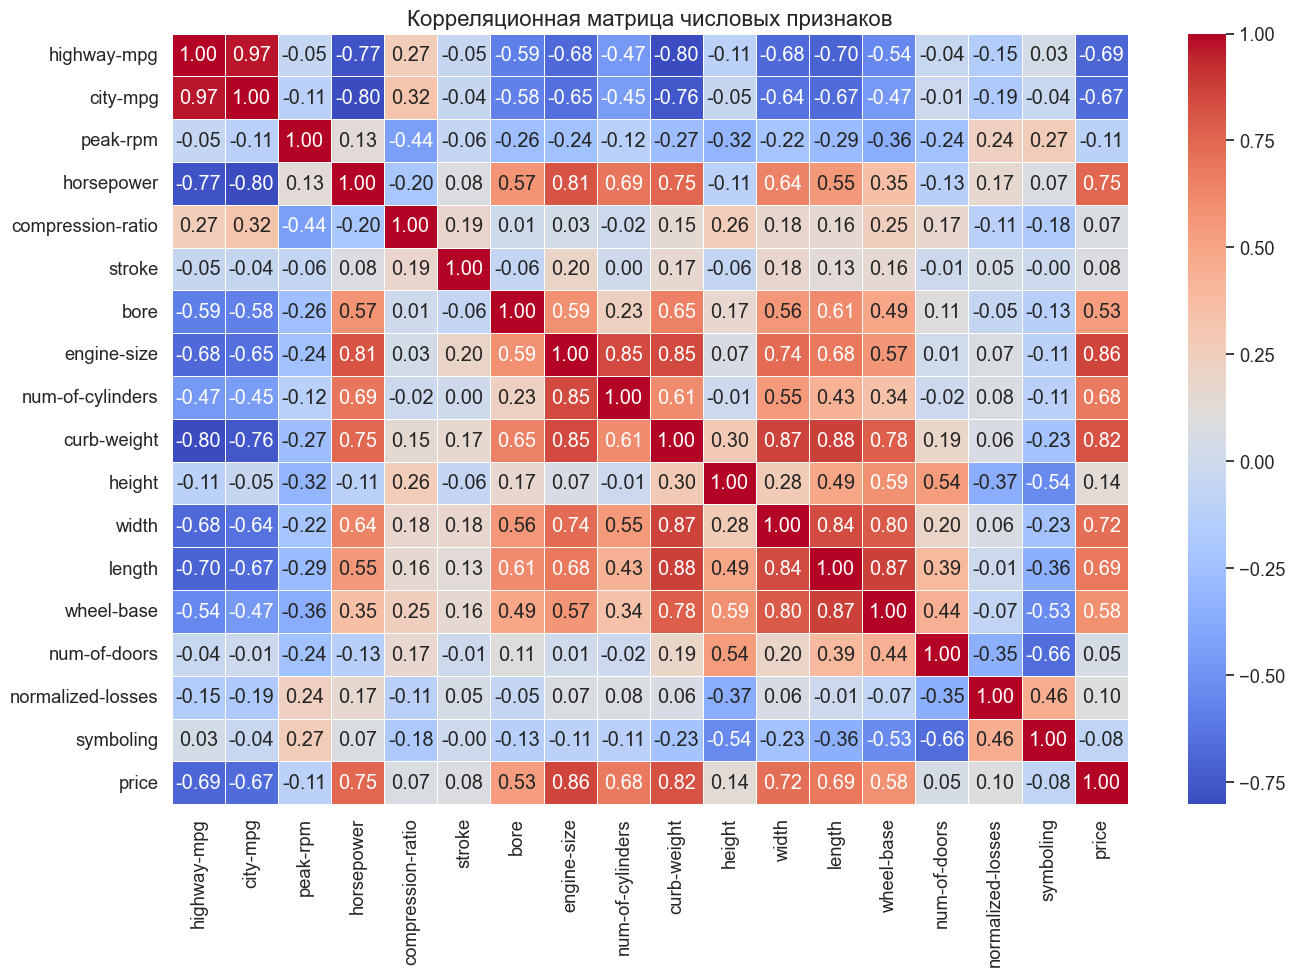

In [11]:
# Вычисляем корреляционную матрицу для числовых признаков и целевой переменной
correlation_matrix = df_clean[numerical_cols + ['price']].corr()

# Визуализируем корреляционную матрицу с помощью heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()

### 2.5 Визуализировать взаимосвязь между `target`-переменной и каждым из признаком

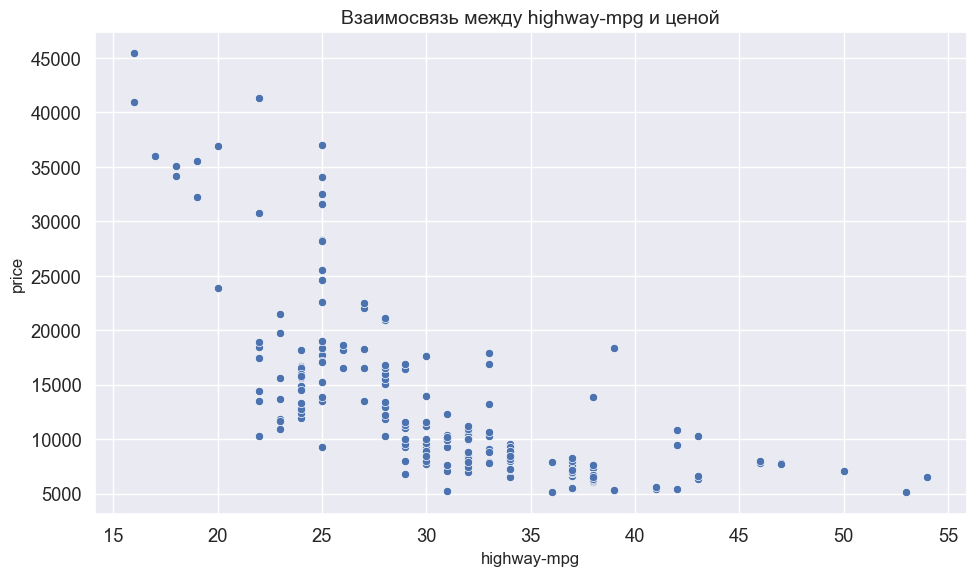

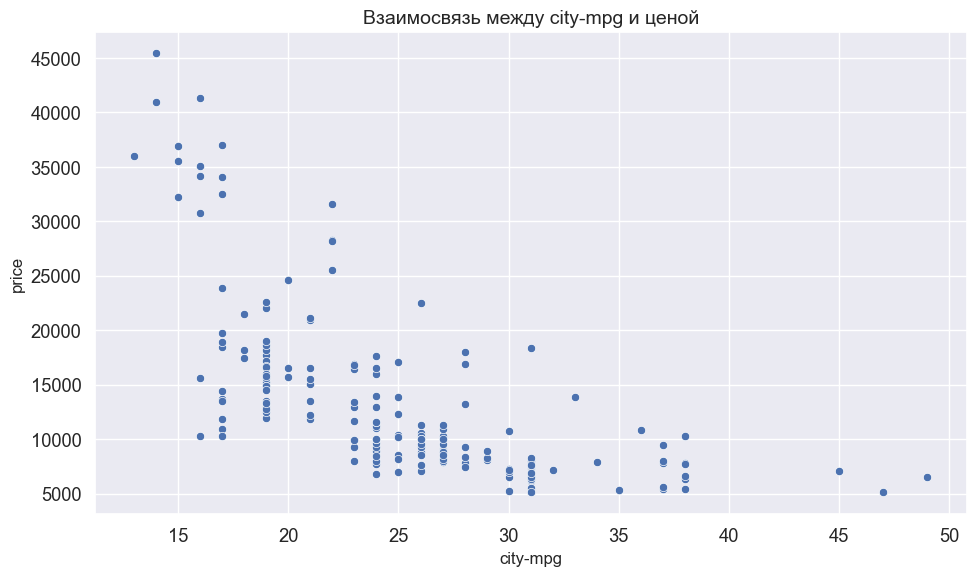

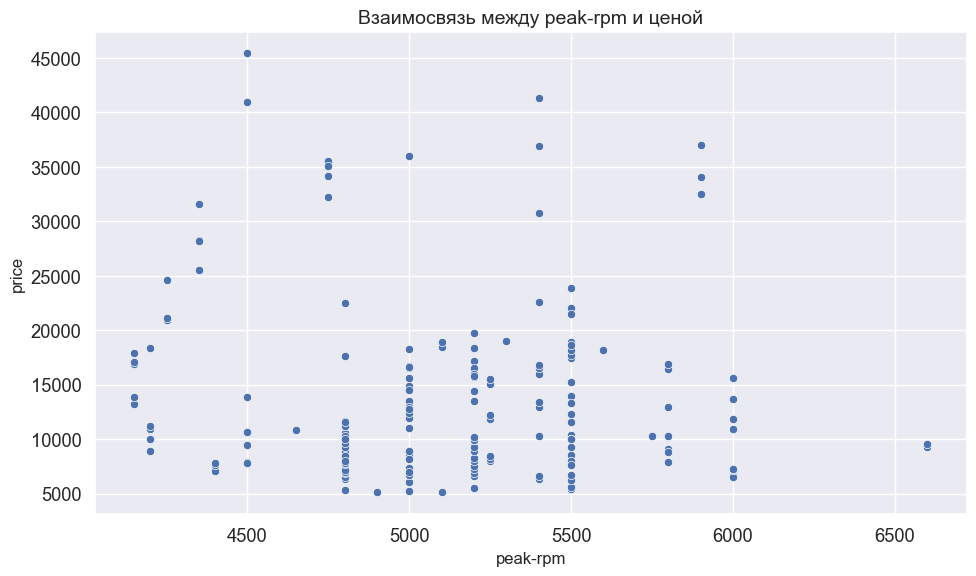

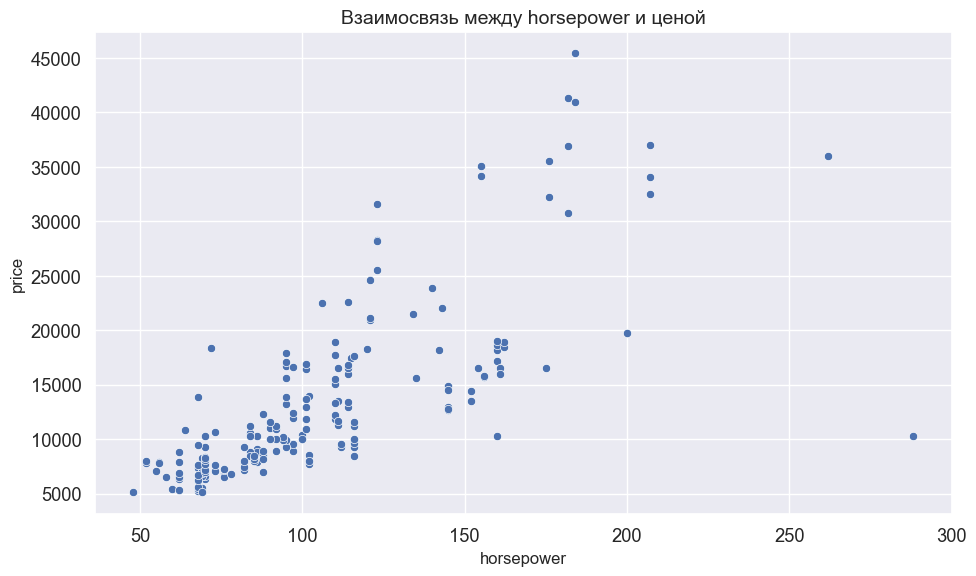

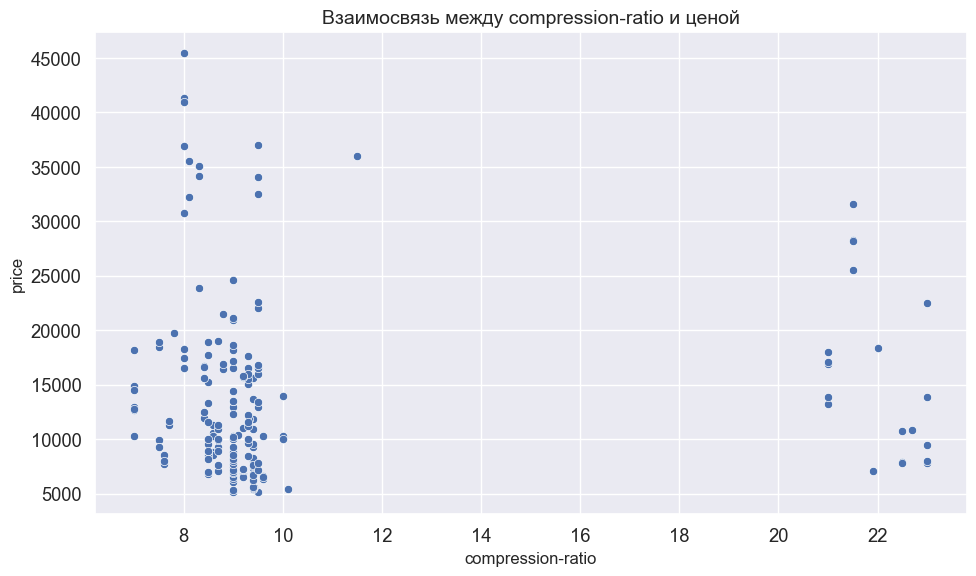

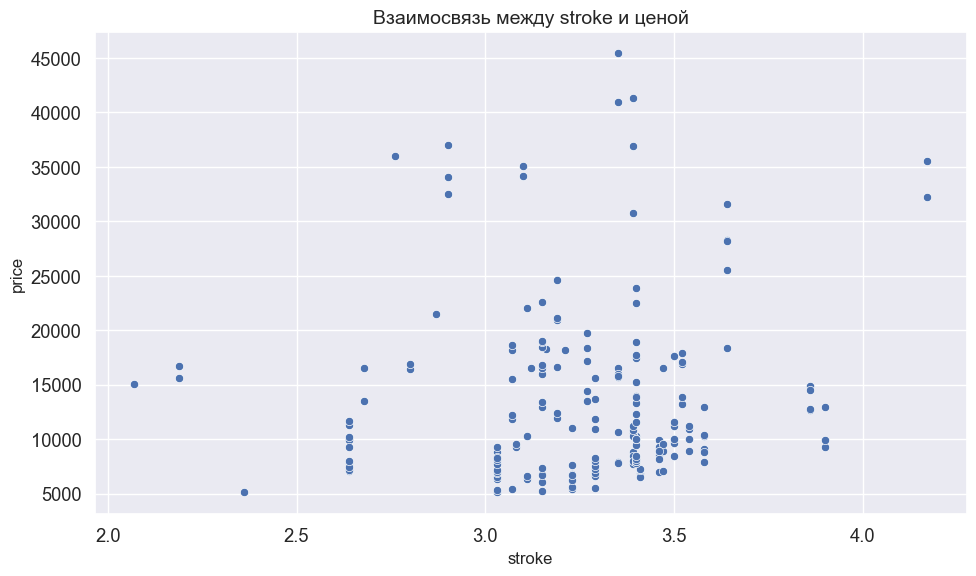

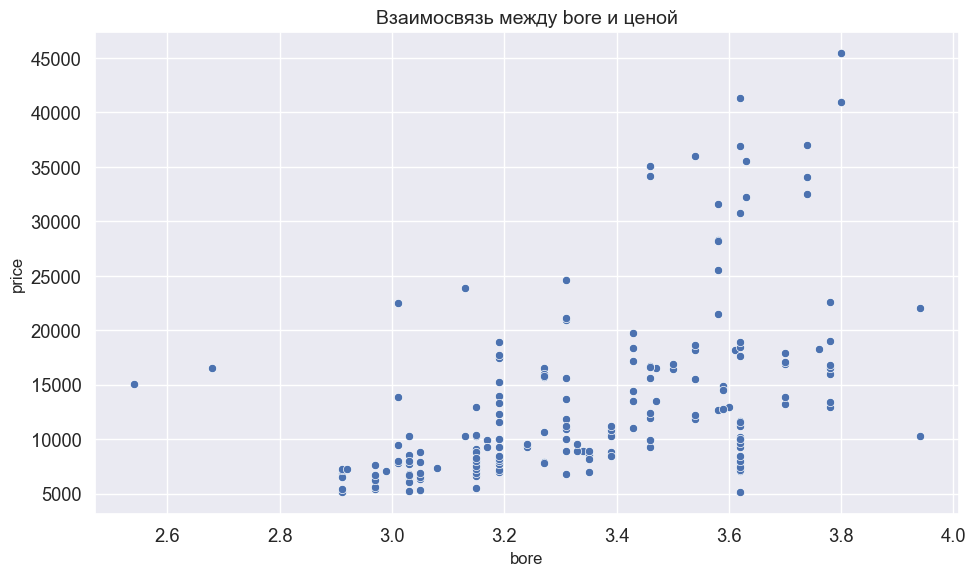

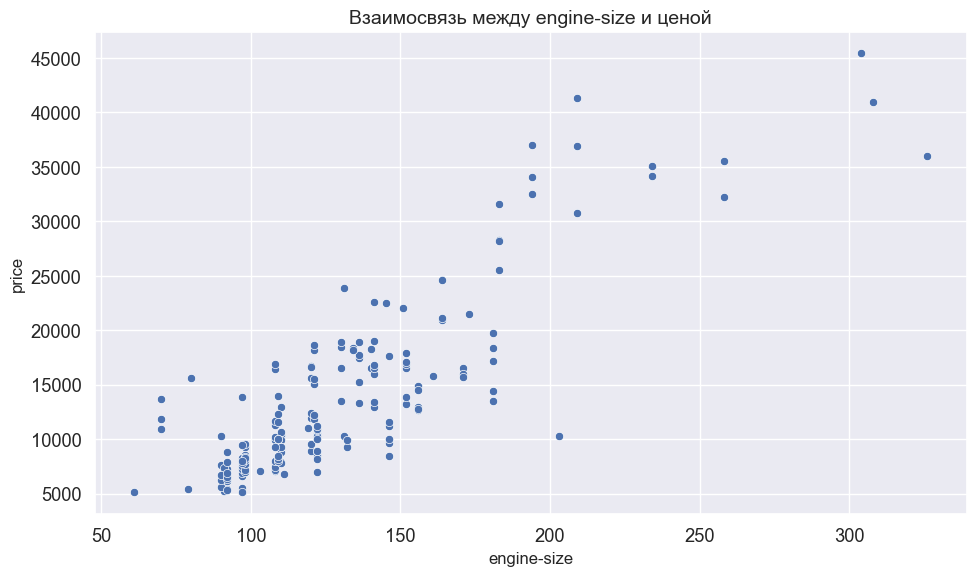

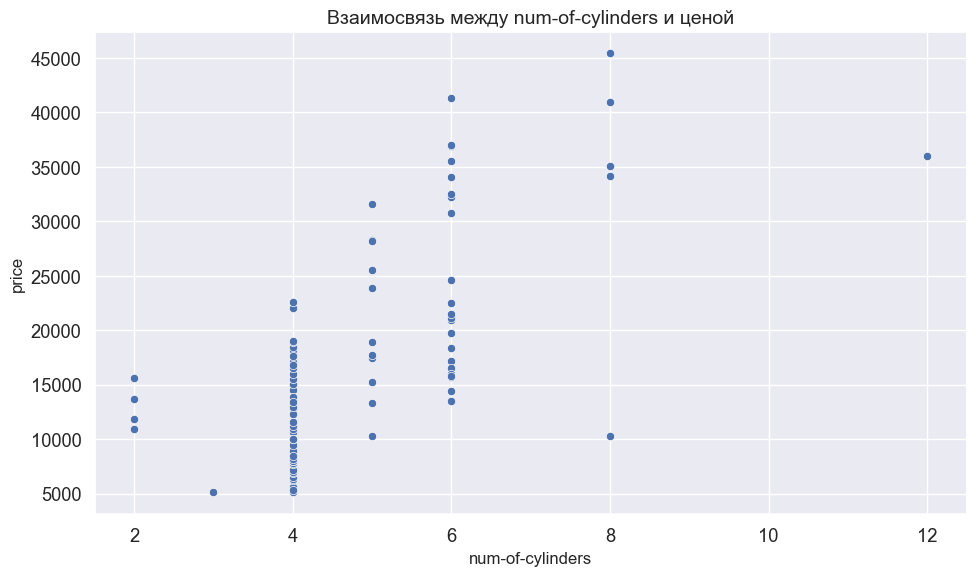

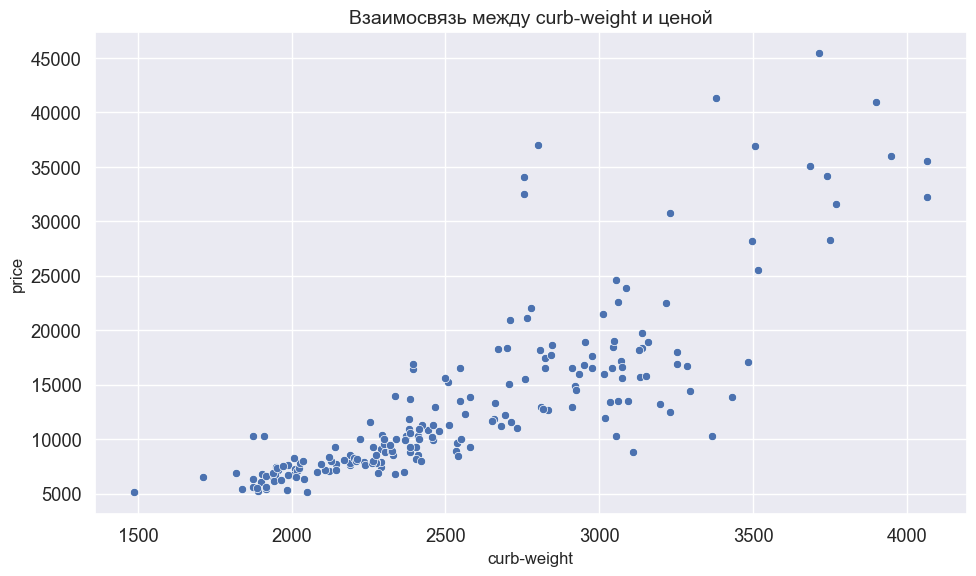

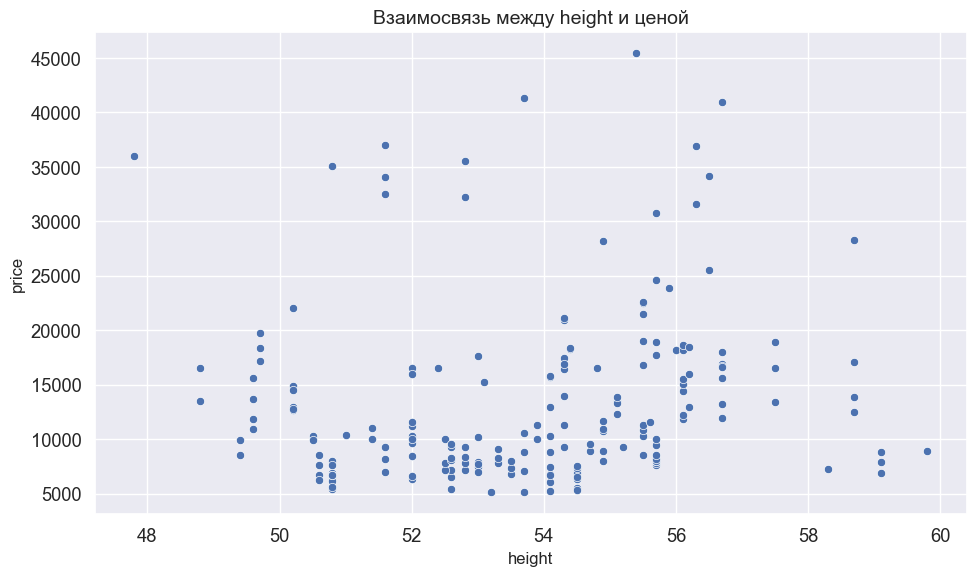

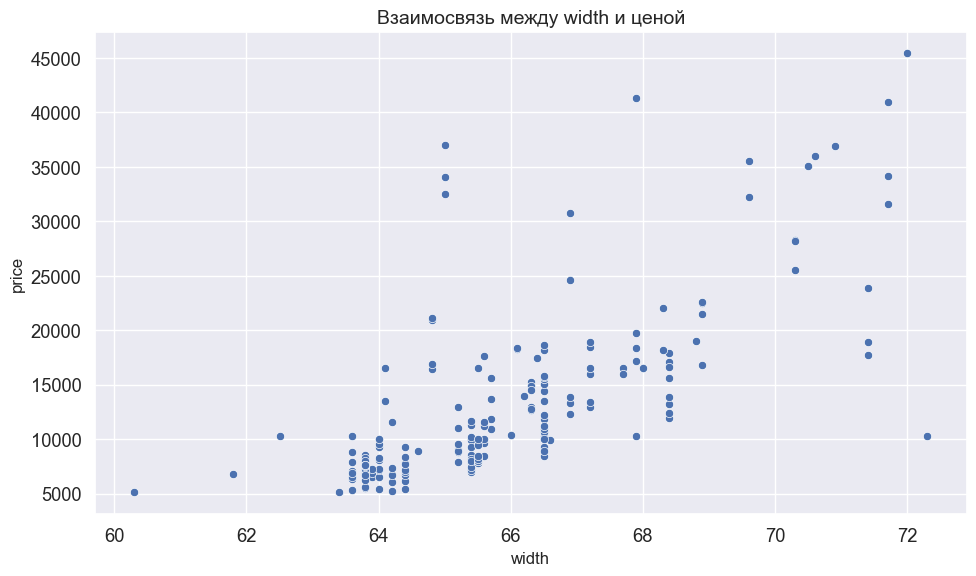

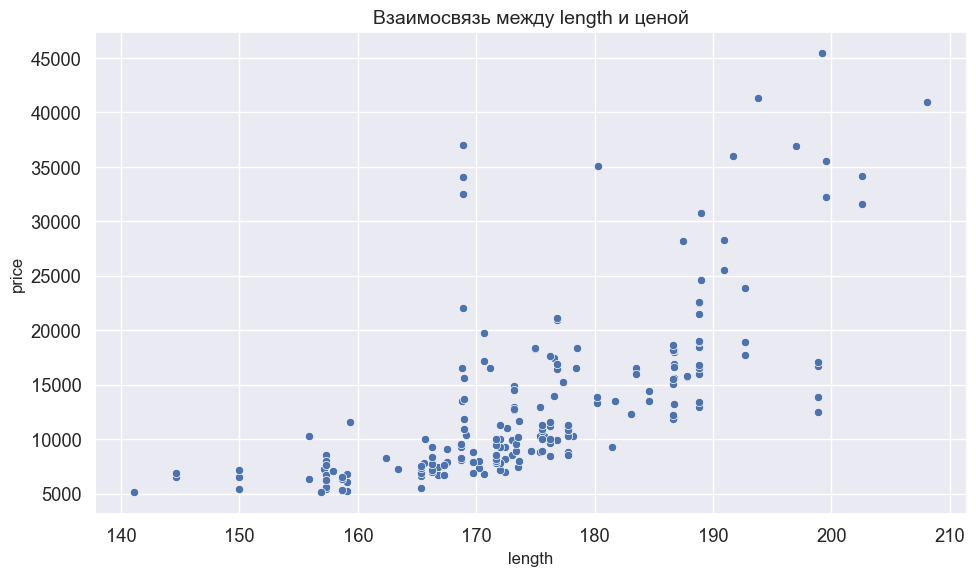

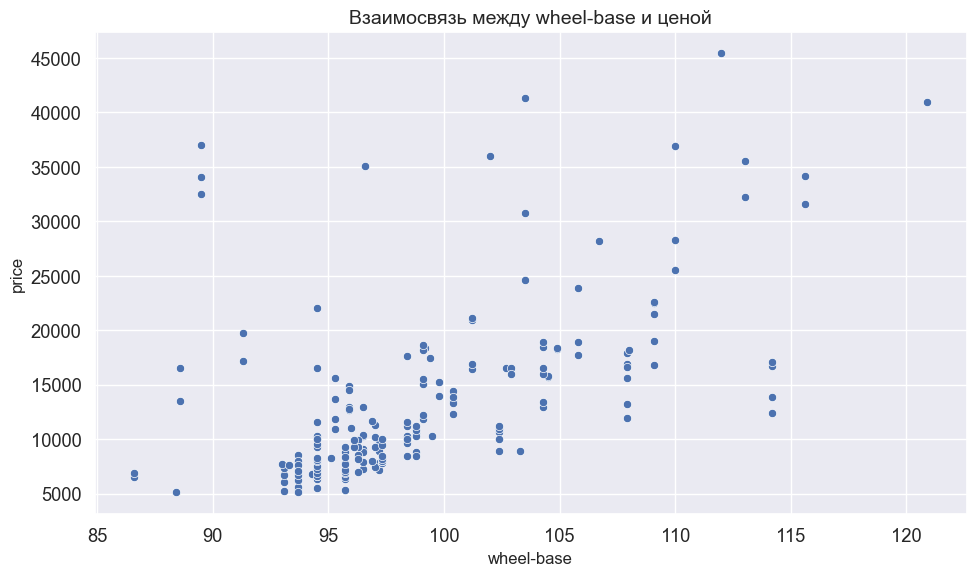

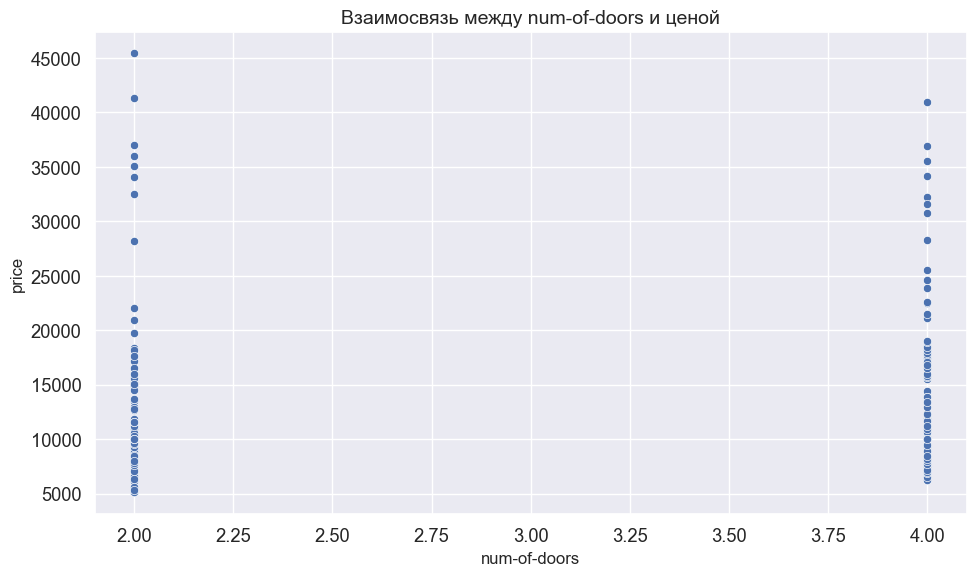

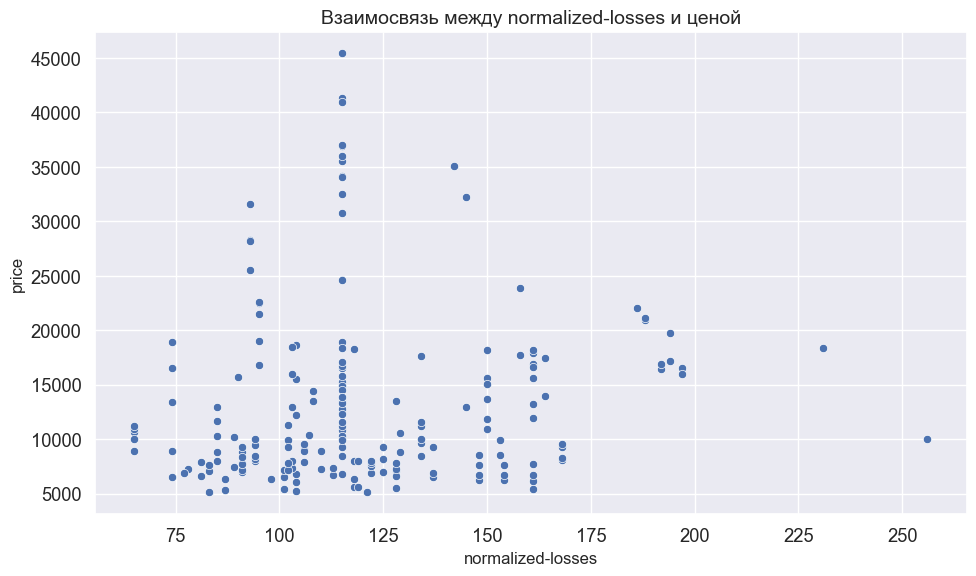

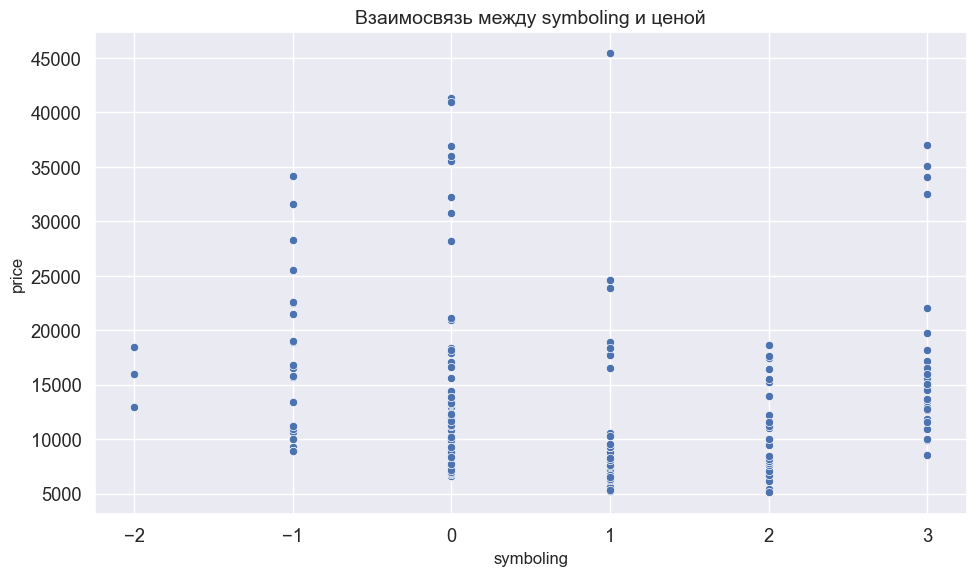

In [12]:
# Визуализация взаимосвязи между целевой переменной и числовыми признаками
for feature in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='price', data=df_clean)
    plt.title(f'Взаимосвязь между {feature} и ценой', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('price', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

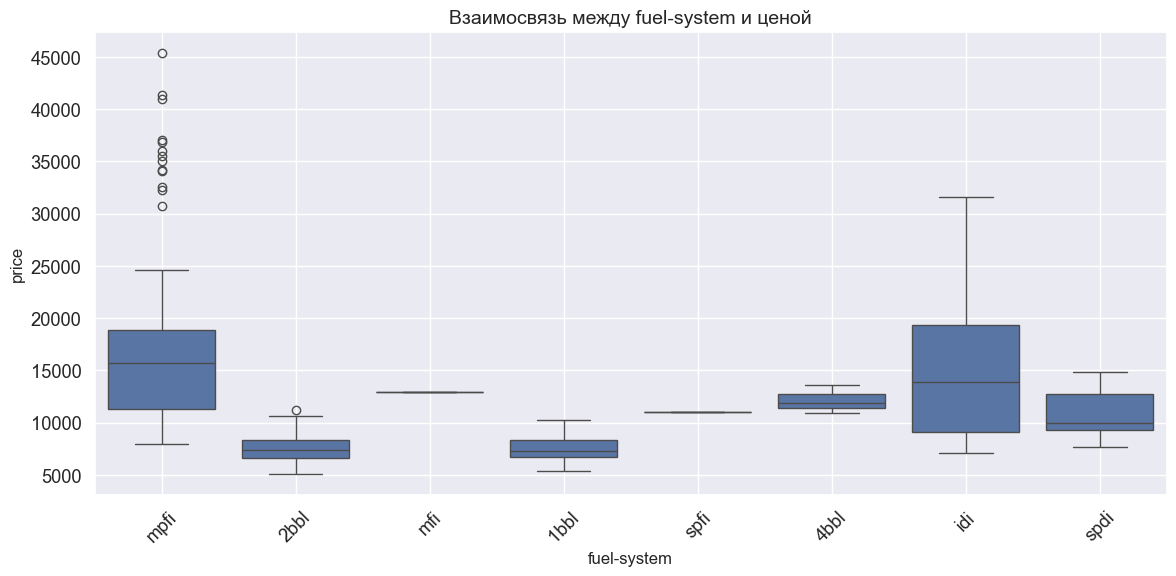

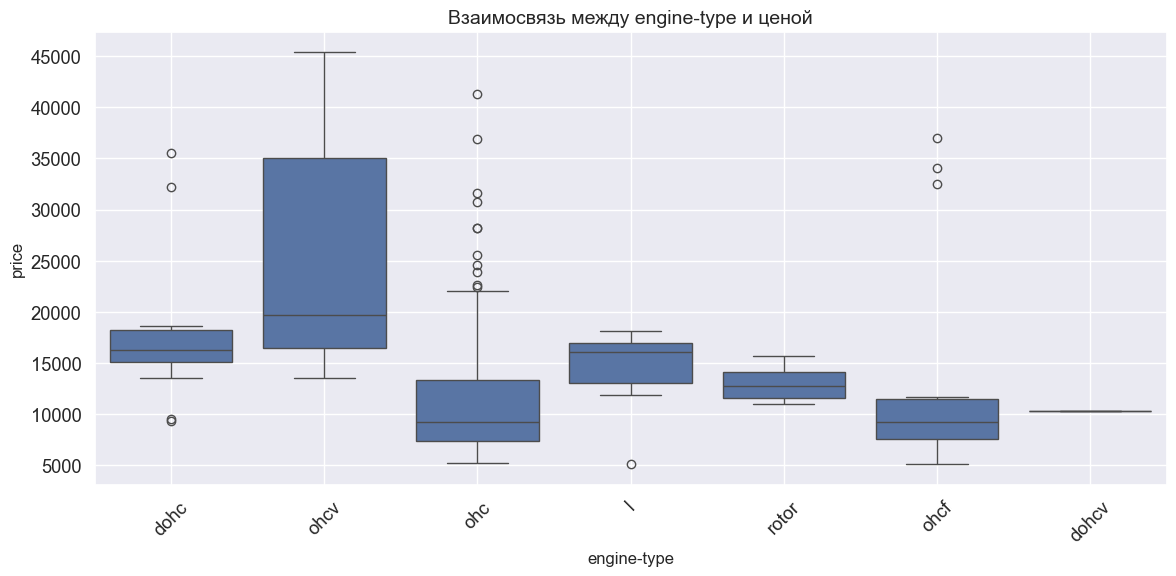

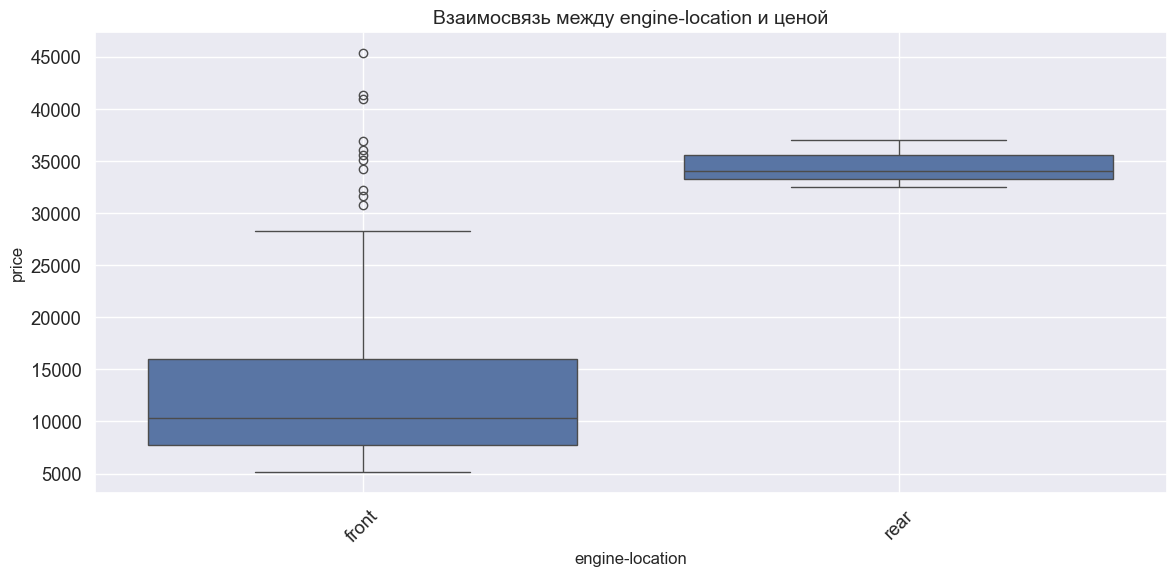

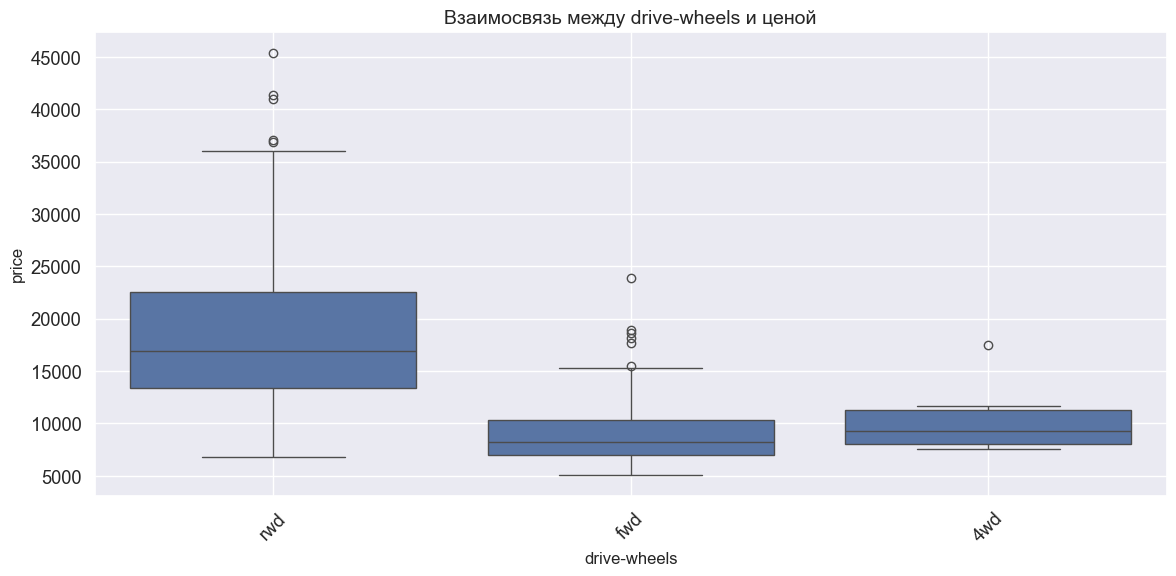

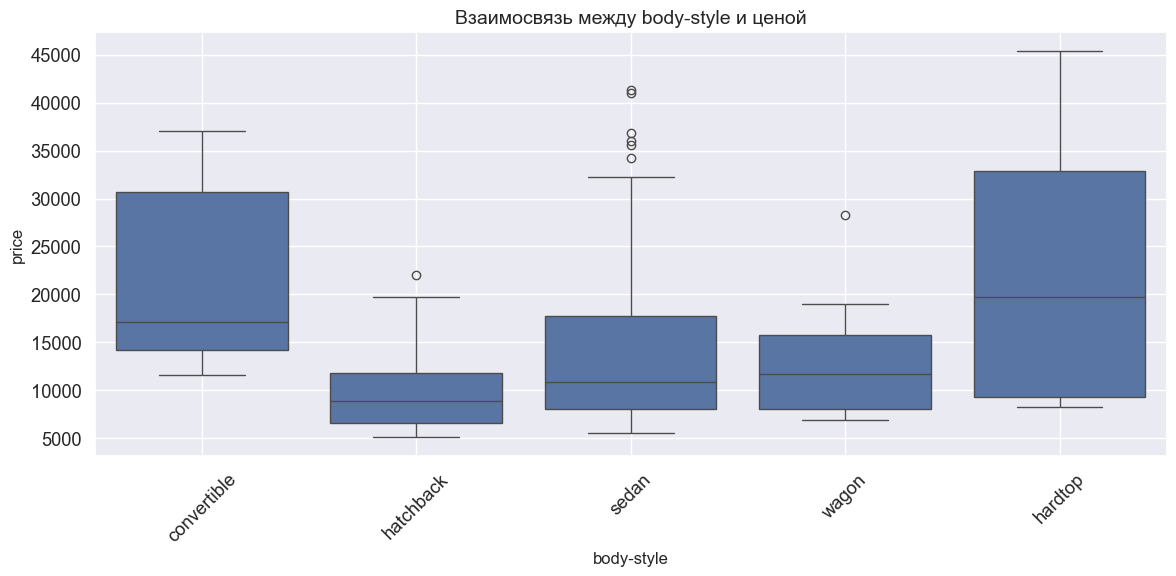

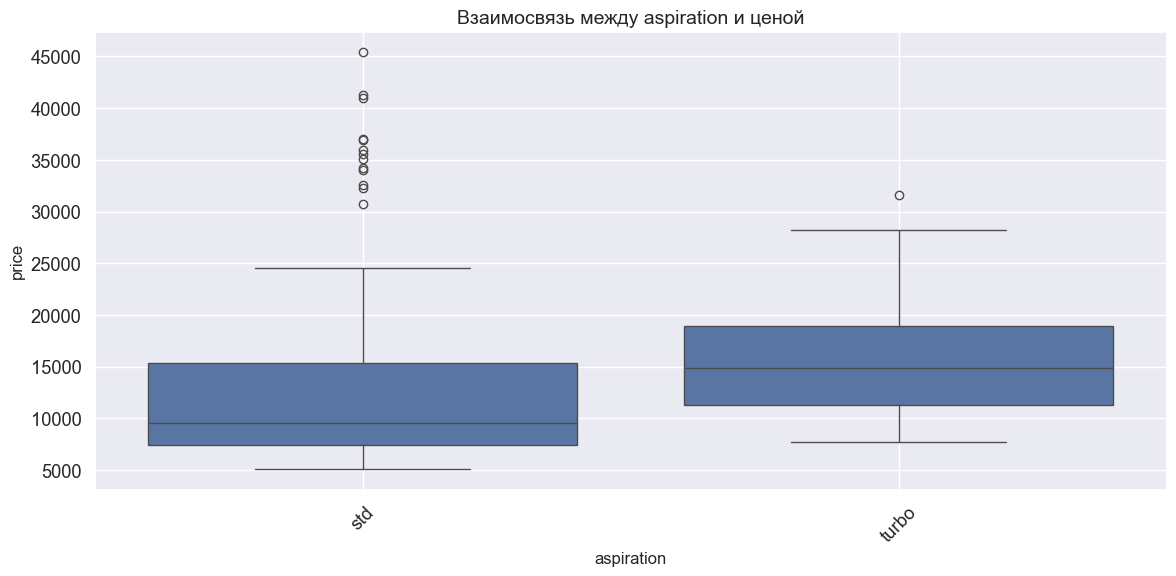

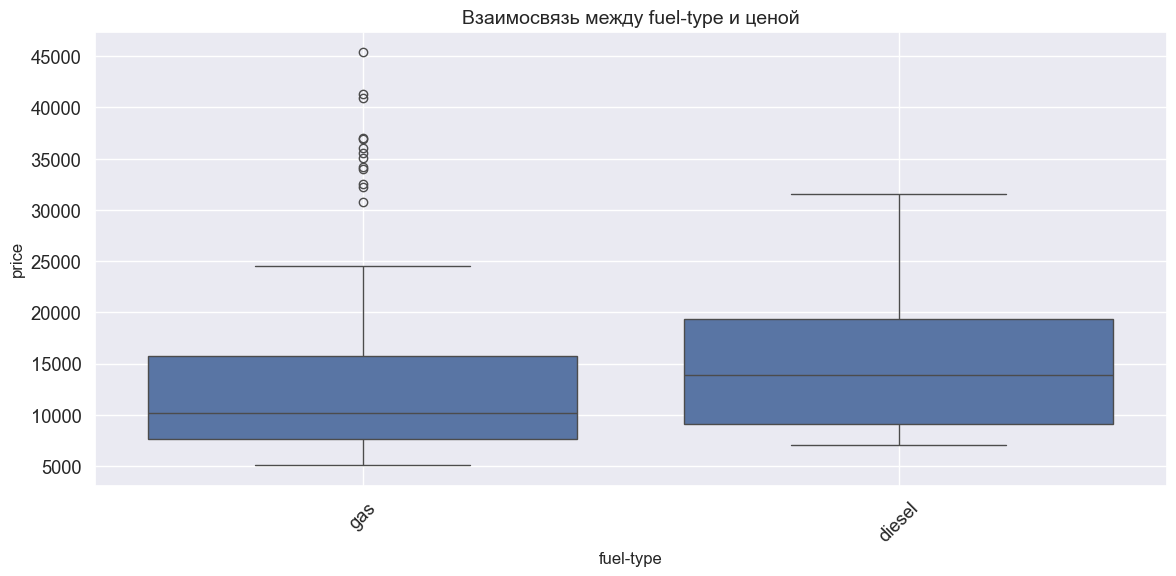

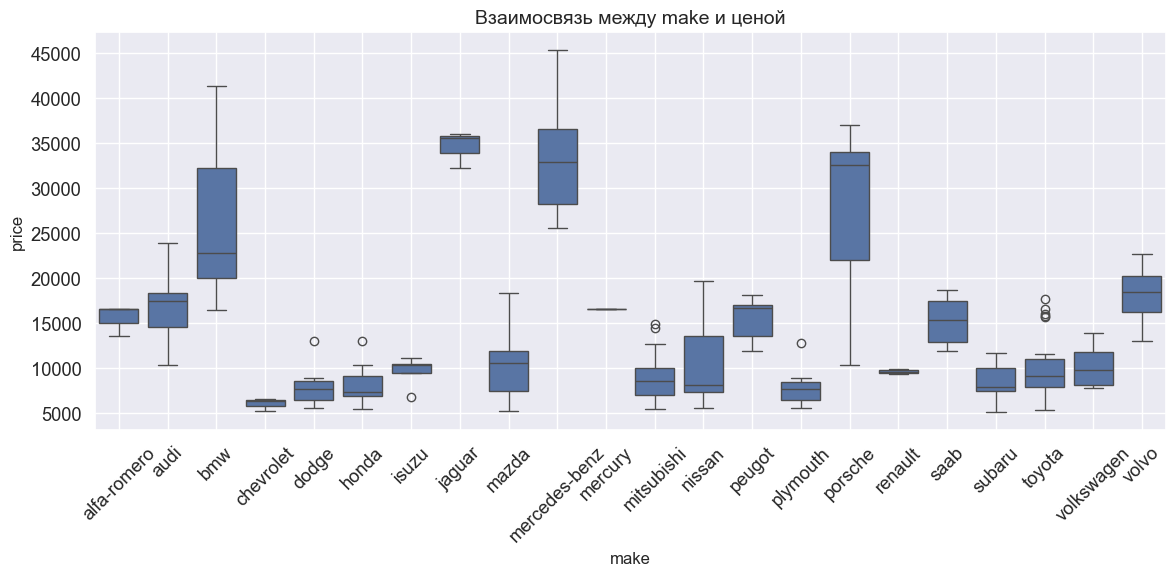

In [13]:
# Визуализация взаимосвязи между целевой переменной и категориальными признаками
for feature in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='price', data=df_clean)
    plt.title(f'Взаимосвязь между {feature} и ценой', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('price', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

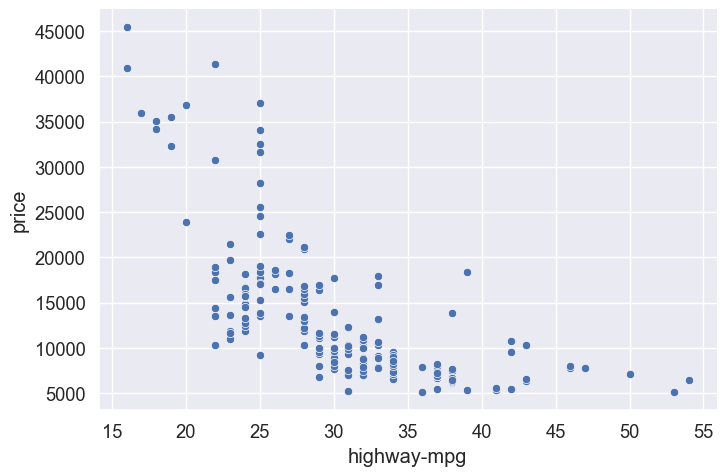

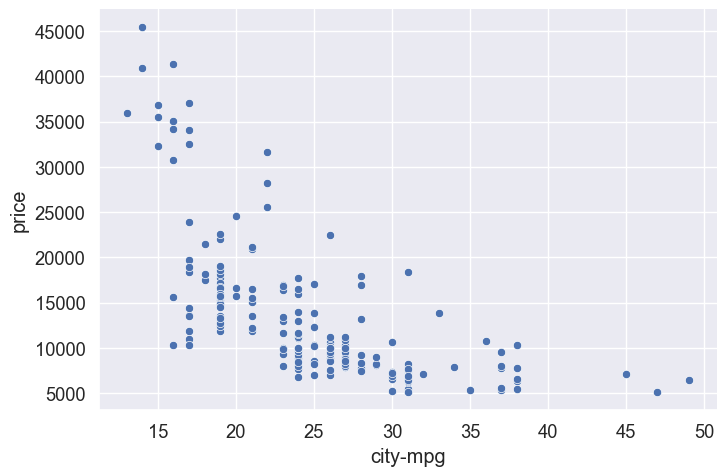

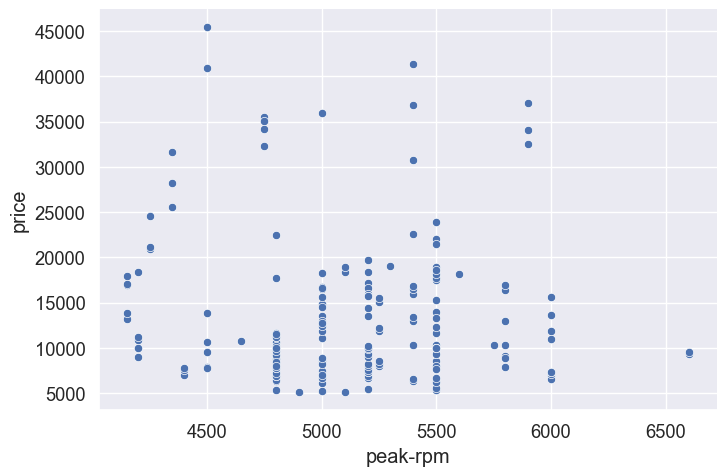

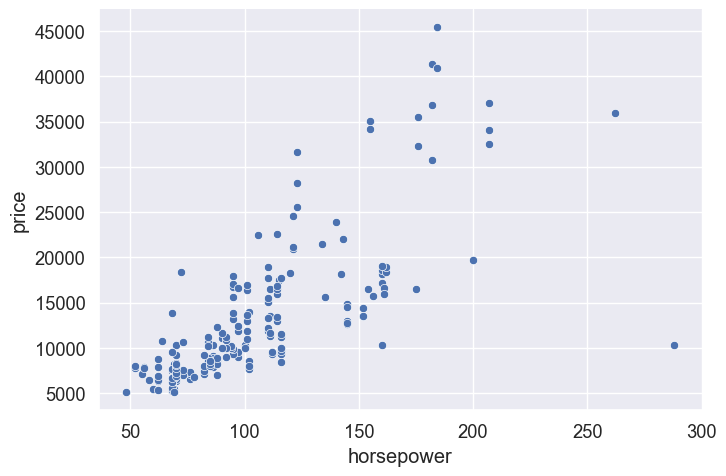

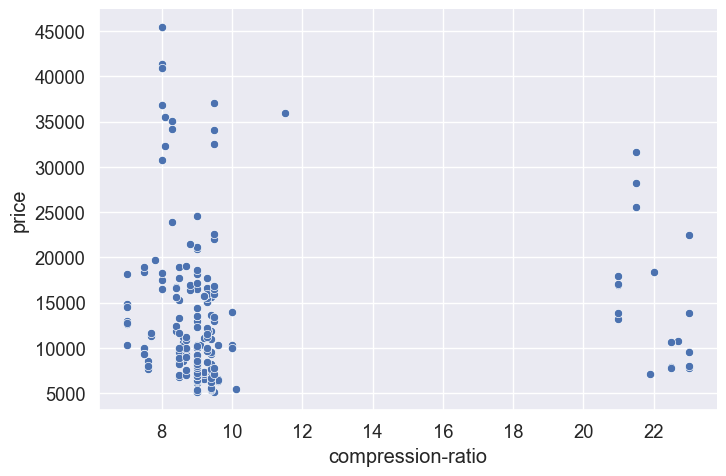

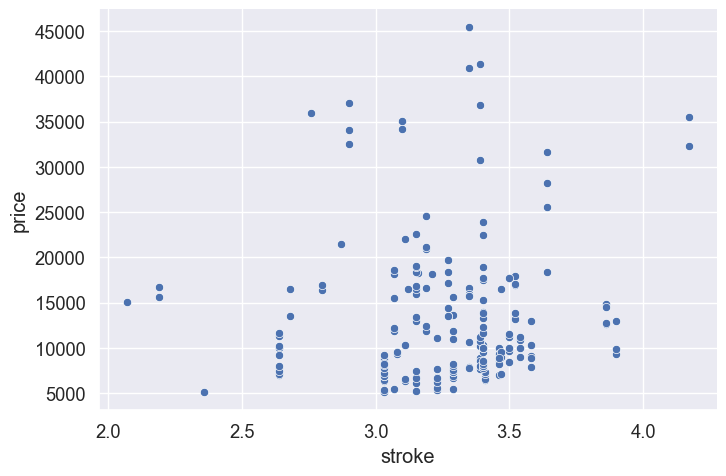

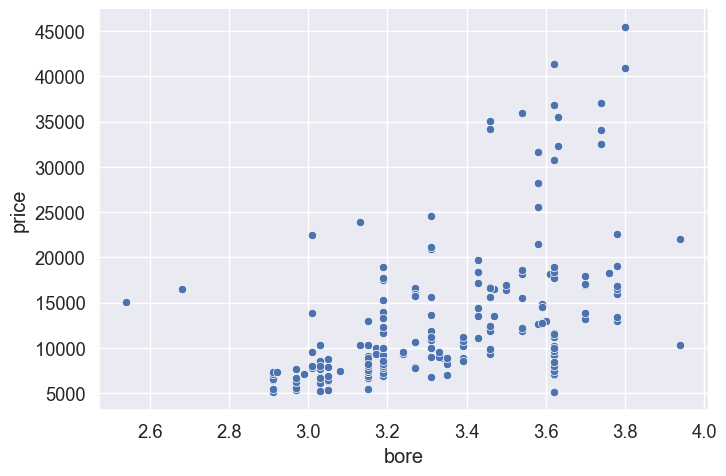

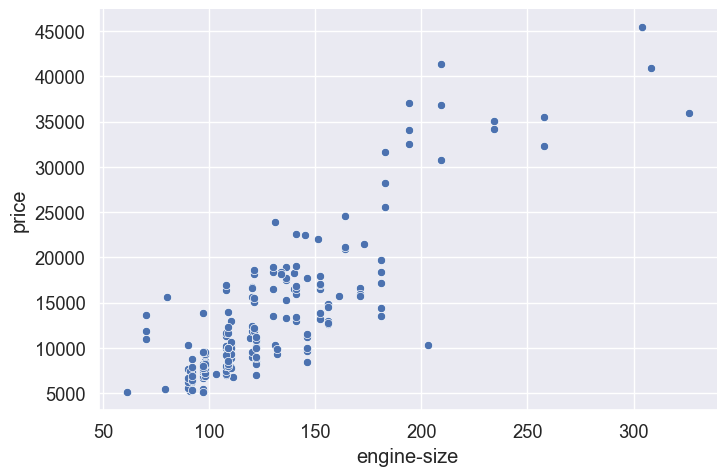

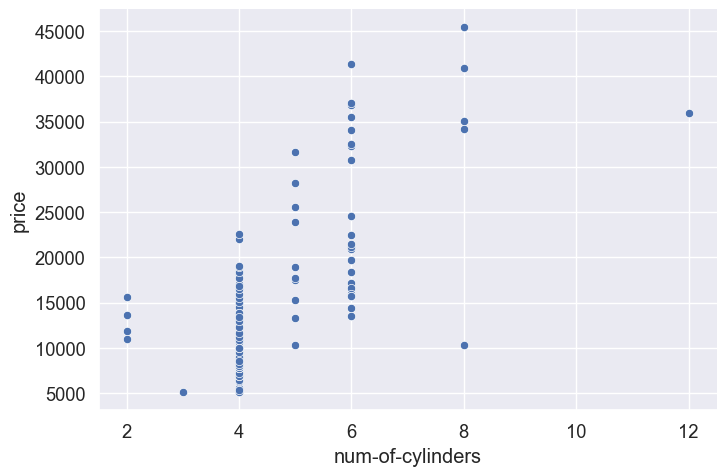

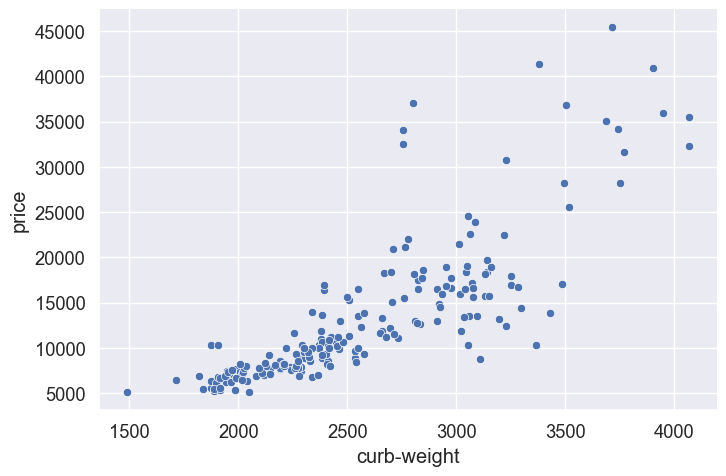

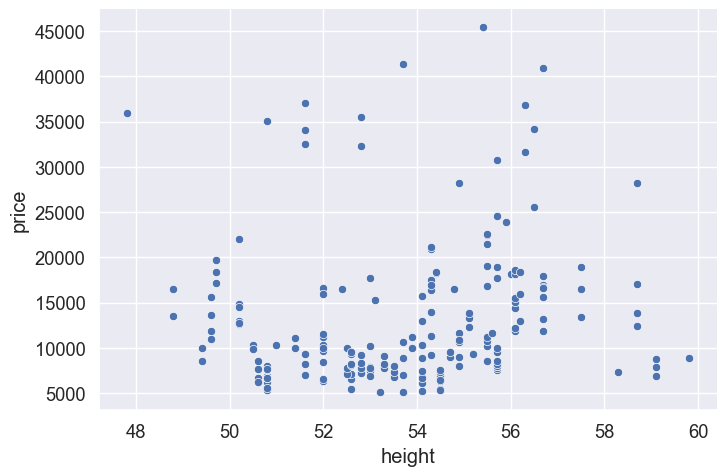

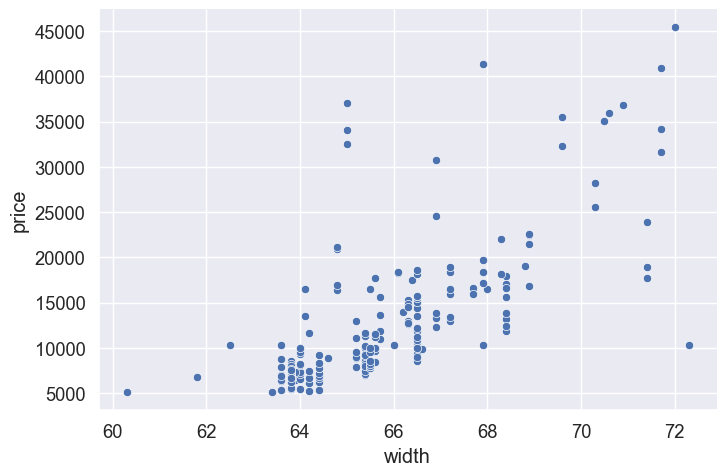

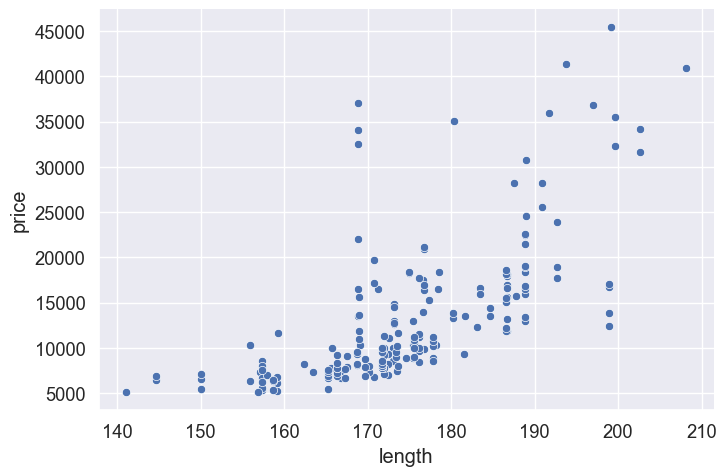

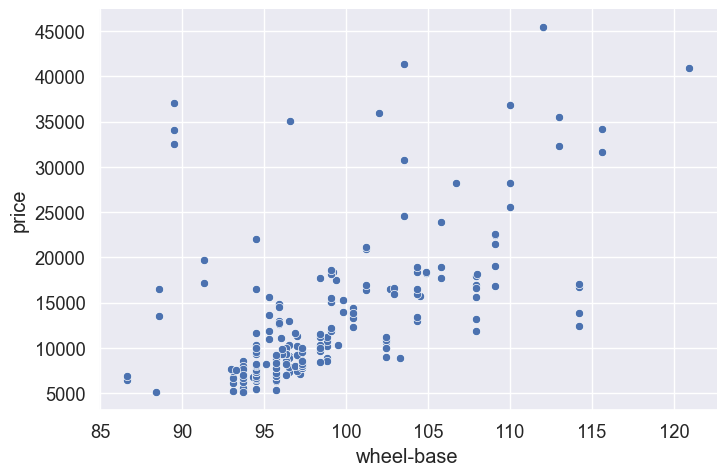

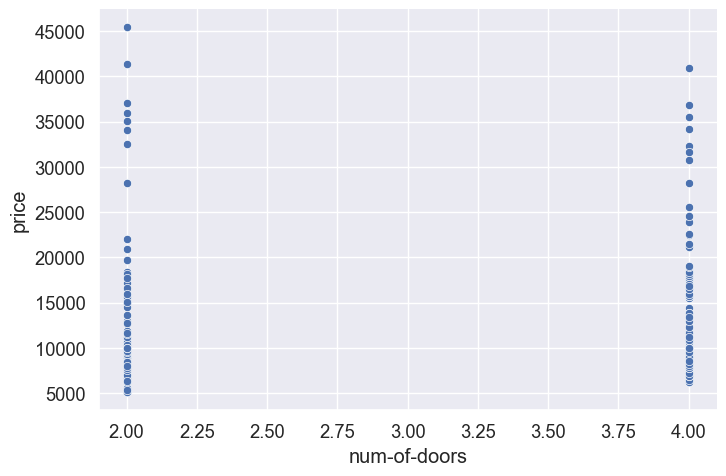

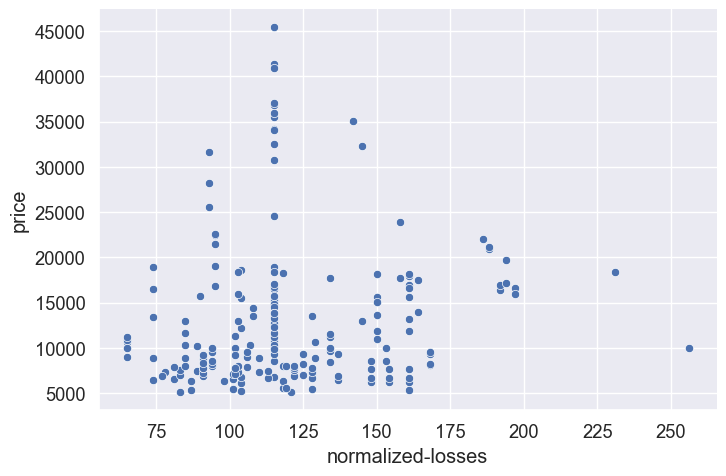

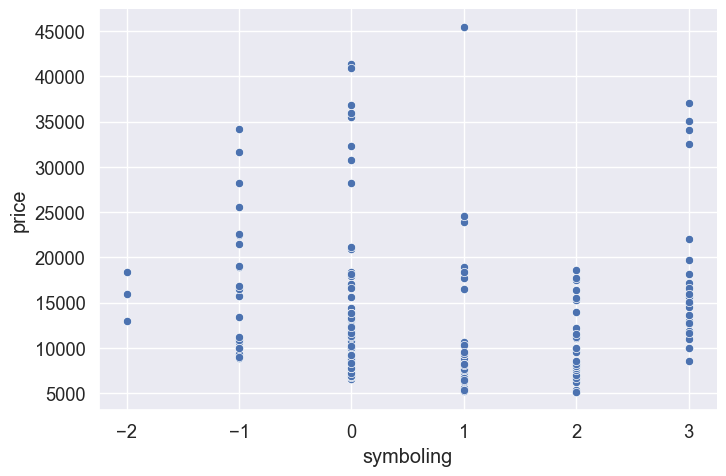

In [14]:
# Создаем диаграммы попарного распределения между целевой переменной и каждым числовым признаком
for feature in numerical_cols:
    g = sns.FacetGrid(df_clean, height=5, aspect=1.5)
    g.map(sns.scatterplot, feature, 'price')
    g.set_axis_labels(feature, 'price')
    g.set_titles(f'Распределение {feature} и price')
    g.tight_layout()
    plt.show()

### 2.6 Разбить выборку на обучающую и тестовую

In [15]:
# Сохраняем исходные датафреймы для этапа 2
df_original = df_clean.copy()

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df_clean.drop('price', axis=1)
y = df_clean['price']

# Разбиваем выборку на обучающую и тестовую (80% обучающая, 20% тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (164, 25)
Размер тестовой выборки: (41, 25)


In [16]:
# Создаем копии датафреймов без категориальных признаков
X_train_numeric = X_train.drop(categorical_cols, axis=1)
X_test_numeric = X_test.drop(categorical_cols, axis=1)

# Нормализуем числовые признаки
scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)
X_test_numeric_scaled = scaler.transform(X_test_numeric)

# Преобразуем обратно в датафреймы для удобства
X_train_numeric_scaled = pd.DataFrame(X_train_numeric_scaled, columns=X_train_numeric.columns, index=X_train_numeric.index)
X_test_numeric_scaled = pd.DataFrame(X_test_numeric_scaled, columns=X_test_numeric.columns, index=X_test_numeric.index)

print(f"Размер обучающей выборки без категориальных признаков: {X_train_numeric_scaled.shape}")
print(f"Размер тестовой выборки без категориальных признаков: {X_test_numeric_scaled.shape}")

Размер обучающей выборки без категориальных признаков: (164, 17)
Размер тестовой выборки без категориальных признаков: (41, 17)


## 3. Регрессия МНК

### 3.1 Обучить модель линейной регрессии `LinearRegression`

In [17]:
# Создаем и обучаем модель линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train_numeric_scaled, y_train)

# Делаем предсказания на тестовой выборке
y_pred_lr = lr_model.predict(X_test_numeric_scaled)

### 3.2 Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе

In [18]:
# Функция для вычисления и вывода метрик
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Метрики для модели {model_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R^2: {r2:.4f}")
    
    return {'mse': mse, 'mae': mae, 'r2': r2}

# Вычисляем метрики для линейной регрессии
lr_metrics = evaluate_model(y_test, y_pred_lr, "LinearRegression")

Метрики для модели LinearRegression:
MSE: 15520943.72
MAE: 2774.17
R^2: 0.8021


### 3.3 Вывести `model.coef_` и `model.intercept_`

In [19]:
# Выводим коэффициенты и свободный член модели
print("Коэффициенты модели:")
for feature, coef in zip(X_train_numeric_scaled.columns, lr_model.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nСвободный член (intercept): {lr_model.intercept_:.4f}")

Коэффициенты модели:
highway-mpg: -556.4530
city-mpg: -1428.1979
peak-rpm: 1353.5373
horsepower: 70.0365
compression-ratio: 1425.9867
stroke: -1694.4209
bore: -1548.8494
engine-size: 9550.0695
num-of-cylinders: -3185.4286
curb-weight: -773.7499
height: 429.6183
width: 726.7756
length: -699.0084
wheel-base: 621.0657
num-of-doors: 596.1239
normalized-losses: -60.0775
symboling: 377.7667

Свободный член (intercept): 13103.1280


### 3.4 Построить график (`barh`) с важностью коэфициентов при соответствующих признаках

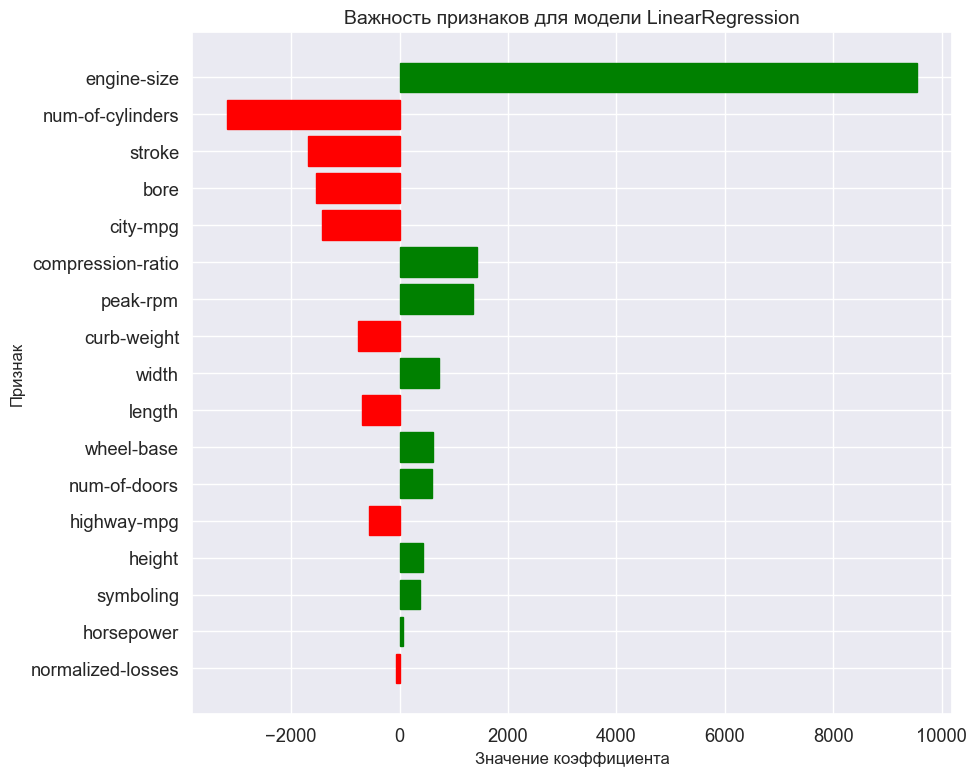

In [20]:
# Функция для построения графика важности коэффициентов
def plot_feature_importance(model, feature_names, model_name):
    # Создаем датафрейм с коэффициентами
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
    
    # Сортируем по абсолютному значению коэффициентов
    coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
    coef_df = coef_df.sort_values('Abs_Coefficient', ascending=True)
    
    # Строим горизонтальную столбчатую диаграмму
    plt.figure(figsize=(10, 8))
    bars = plt.barh(coef_df['Feature'], coef_df['Coefficient'])
    
    # Добавляем цвета в зависимости от знака коэффициента
    for i, bar in enumerate(bars):
        if coef_df['Coefficient'].iloc[i] < 0:
            bar.set_color('red')
        else:
            bar.set_color('green')
    
    plt.title(f'Важность признаков для модели {model_name}', fontsize=14)
    plt.xlabel('Значение коэффициента', fontsize=12)
    plt.ylabel('Признак', fontsize=12)
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# Строим график важности коэффициентов для линейной регрессии
plot_feature_importance(lr_model, X_train_numeric_scaled.columns, "LinearRegression")

## 4. Для каждого вида регрессии (`Ridge`, `LASSO`, `Elastic Net`)

### 4.1 Ridge регрессия

#### 4.1.1 С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge`)

In [21]:
# Определяем сетку параметров для Ridge регрессии
ridge_params = {'alpha': np.logspace(-3, 3, 20)}

# Создаем объект Ridge
ridge = Ridge(random_state=42)

# Создаем объект GridSearchCV
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучаем модель с подбором параметров
ridge_grid.fit(X_train_numeric_scaled, y_train)

# Выводим лучшие параметры
print(f"Лучшее значение alpha для Ridge: {ridge_grid.best_params_['alpha']}")
print(f"Лучший score (отрицательный MSE): {ridge_grid.best_score_:.2f}")

# Получаем лучшую модель
best_ridge = ridge_grid.best_estimator_

# Делаем предсказания на тестовой выборке
y_pred_ridge = best_ridge.predict(X_test_numeric_scaled)

Лучшее значение alpha для Ridge: 54.555947811685144
Лучший score (отрицательный MSE): -16421037.01


#### 4.1.2 Вывести значения гиперпараметров, коэффициенты регрессии и значения метрик на тестовом наборе для наилучшей модели

In [22]:
# Выводим гиперпараметры лучшей модели Ridge
print(f"Гиперпараметры лучшей модели Ridge:")
print(f"alpha: {best_ridge.alpha}")

# Выводим коэффициенты и свободный член
print("\nКоэффициенты модели:")
for feature, coef in zip(X_train_numeric_scaled.columns, best_ridge.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nСвободный член (intercept): {best_ridge.intercept_:.4f}")

# Вычисляем метрики для Ridge регрессии
ridge_metrics = evaluate_model(y_test, y_pred_ridge, "Ridge")

Гиперпараметры лучшей модели Ridge:
alpha: 54.555947811685144

Коэффициенты модели:
highway-mpg: -723.8054
city-mpg: -657.2471
peak-rpm: 436.2397
horsepower: 739.9390
compression-ratio: 610.6971
stroke: -326.3504
bore: 203.0719
engine-size: 1909.4208
num-of-cylinders: 932.7597
curb-weight: 936.0830
height: 46.5840
width: 501.4229
length: 487.7452
wheel-base: 441.8946
num-of-doors: 33.5356
normalized-losses: -14.7930
symboling: 439.5008

Свободный член (intercept): 13103.1280
Метрики для модели Ridge:
MSE: 19311501.18
MAE: 3010.93
R^2: 0.7538


#### 4.1.3 Построить график (`barh`) с важностью коэфициентов при соответствующих признаках

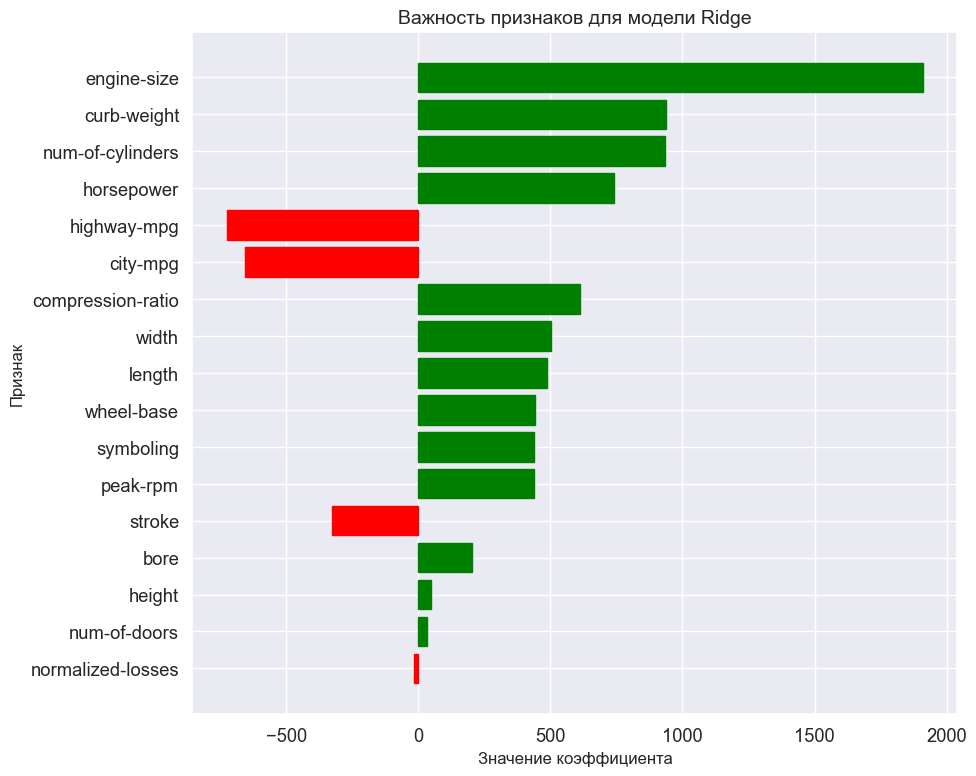

In [23]:
# Строим график важности коэффициентов для Ridge регрессии
plot_feature_importance(best_ridge, X_train_numeric_scaled.columns, "Ridge")

### 4.2 LASSO регрессия

#### 4.2.1 С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `LASSO`)

In [24]:
# Определяем сетку параметров для LASSO регрессии
lasso_params = {'alpha': np.logspace(-3, 1, 20)}

# Создаем объект Lasso
lasso = Lasso(random_state=42, max_iter=10000)

# Создаем объект GridSearchCV
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучаем модель с подбором параметров
lasso_grid.fit(X_train_numeric_scaled, y_train)

# Выводим лучшие параметры
print(f"Лучшее значение alpha для LASSO: {lasso_grid.best_params_['alpha']}")
print(f"Лучший score (отрицательный MSE): {lasso_grid.best_score_:.2f}")

# Получаем лучшую модель
best_lasso = lasso_grid.best_estimator_

# Делаем предсказания на тестовой выборке
y_pred_lasso = best_lasso.predict(X_test_numeric_scaled)

Лучшее значение alpha для LASSO: 10.0
Лучший score (отрицательный MSE): -18493411.40


#### 4.2.2 Вывести значения гиперпараметров, коэффициенты регрессии и значения метрик на тестовом наборе для наилучшей модели

In [25]:
# Выводим гиперпараметры лучшей модели LASSO
print(f"Гиперпараметры лучшей модели LASSO:")
print(f"alpha: {best_lasso.alpha}")

# Выводим коэффициенты и свободный член
print("\nКоэффициенты модели:")
for feature, coef in zip(X_train_numeric_scaled.columns, best_lasso.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nСвободный член (intercept): {best_lasso.intercept_:.4f}")

# Вычисляем метрики для LASSO регрессии
lasso_metrics = evaluate_model(y_test, y_pred_lasso, "LASSO")

Гиперпараметры лучшей модели LASSO:
alpha: 10.0

Коэффициенты модели:
highway-mpg: -520.5867
city-mpg: -1314.1856
peak-rpm: 1345.7683
horsepower: 0.0000
compression-ratio: 1337.9976
stroke: -1588.6882
bore: -1387.3082
engine-size: 8982.4361
num-of-cylinders: -2831.8764
curb-weight: -417.7382
height: 383.7993
width: 627.7181
length: -489.3519
wheel-base: 497.9600
num-of-doors: 516.4967
normalized-losses: -57.8594
symboling: 365.2614

Свободный член (intercept): 13103.1280
Метрики для модели LASSO:
MSE: 15331818.10
MAE: 2767.87
R^2: 0.8045


#### 4.2.3 Построить график (`barh`) с важностью коэфициентов при соответствующих признаках

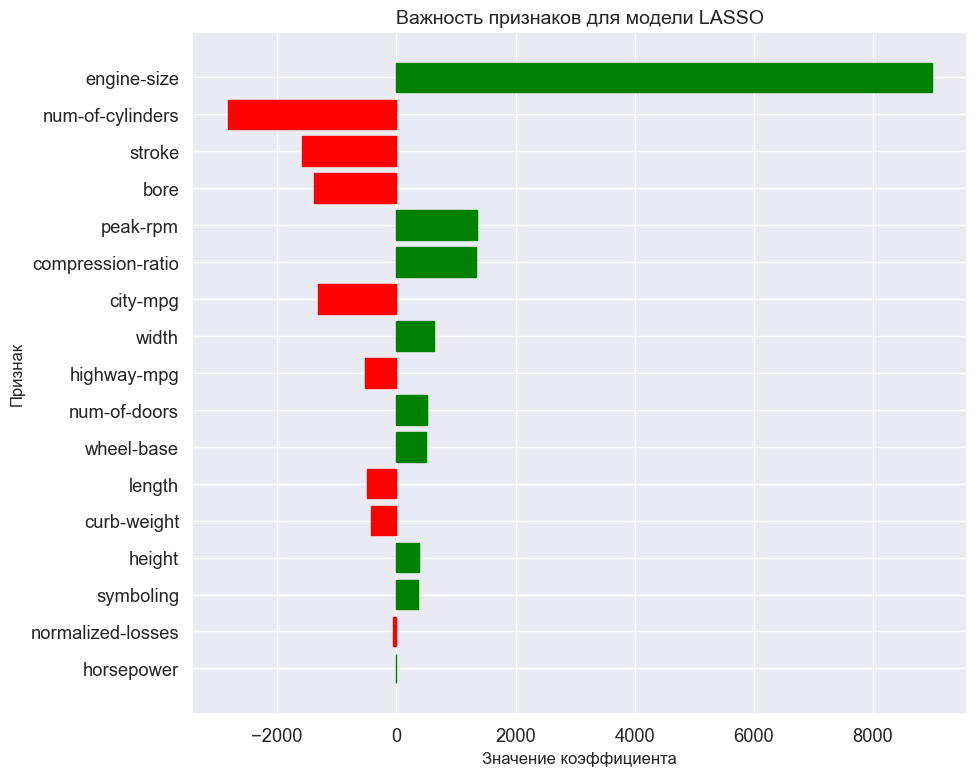

In [26]:
# Строим график важности коэффициентов для LASSO регрессии
plot_feature_importance(best_lasso, X_train_numeric_scaled.columns, "LASSO")

### 4.3 Elastic Net регрессия

#### 4.3.1 С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` и `l1_ratio` для `Elastic Net`)

In [27]:
# Определяем сетку параметров для Elastic Net регрессии
elastic_params = {
    'alpha': np.logspace(-3, 1, 10),
    'l1_ratio': np.linspace(0.1, 0.9, 9)
}

# Создаем объект ElasticNet
elastic = ElasticNet(random_state=42, max_iter=10000)

# Создаем объект GridSearchCV
elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучаем модель с подбором параметров
elastic_grid.fit(X_train_numeric_scaled, y_train)

# Выводим лучшие параметры
print(f"Лучшие параметры для Elastic Net:")
print(f"alpha: {elastic_grid.best_params_['alpha']}")
print(f"l1_ratio: {elastic_grid.best_params_['l1_ratio']}")
print(f"Лучший score (отрицательный MSE): {elastic_grid.best_score_:.2f}")

# Получаем лучшую модель
best_elastic = elastic_grid.best_estimator_

# Делаем предсказания на тестовой выборке
y_pred_elastic = best_elastic.predict(X_test_numeric_scaled)

Лучшие параметры для Elastic Net:
alpha: 1.2915496650148828
l1_ratio: 0.6
Лучший score (отрицательный MSE): -16411308.82


#### 4.3.2 Вывести значения гиперпараметров, коэффициенты регрессии и значения метрик на тестовом наборе для наилучшей модели

In [28]:
# Выводим гиперпараметры лучшей модели Elastic Net
print(f"Гиперпараметры лучшей модели Elastic Net:")
print(f"alpha: {best_elastic.alpha}")
print(f"l1_ratio: {best_elastic.l1_ratio}")

# Выводим коэффициенты и свободный член
print("\nКоэффициенты модели:")
for feature, coef in zip(X_train_numeric_scaled.columns, best_elastic.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nСвободный член (intercept): {best_elastic.intercept_:.4f}")

# Вычисляем метрики для Elastic Net регрессии
elastic_metrics = evaluate_model(y_test, y_pred_elastic, "Elastic Net")

Гиперпараметры лучшей модели Elastic Net:
alpha: 1.2915496650148828
l1_ratio: 0.6

Коэффициенты модели:
highway-mpg: -702.2001
city-mpg: -646.0101
peak-rpm: 309.8159
horsepower: 783.2668
compression-ratio: 493.5732
stroke: -246.0749
bore: 262.2594
engine-size: 1592.5810
num-of-cylinders: 949.4946
curb-weight: 904.0438
height: 24.3412
width: 553.5015
length: 516.9614
wheel-base: 413.6492
num-of-doors: -2.0520
normalized-losses: 28.8979
symboling: 354.6175

Свободный член (intercept): 13103.1280
Метрики для модели Elastic Net:
MSE: 20098668.56
MAE: 3058.44
R^2: 0.7438


#### 4.3.3 Построить график (`barh`) с важностью коэфициентов при соответствующих признаках

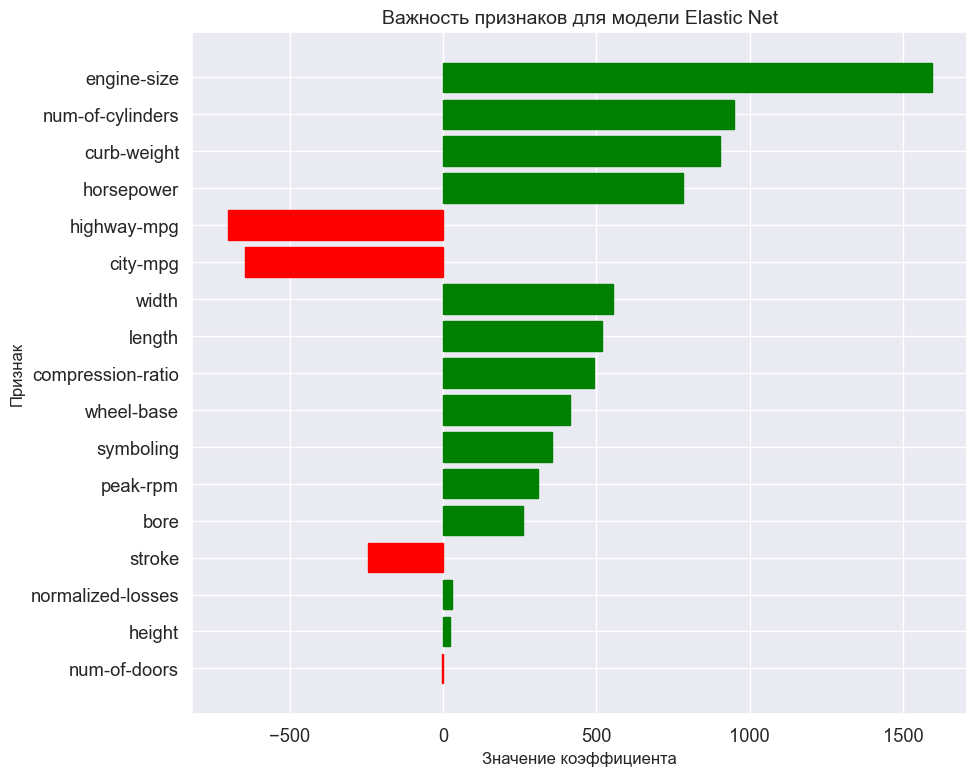

In [29]:
# Строим график важности коэффициентов для Elastic Net регрессии
plot_feature_importance(best_elastic, X_train_numeric_scaled.columns, "Elastic Net")

## 5. Датасет и подготовка данных, этап 2

### 5.1 Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками

In [30]:
# Используем исходные датафреймы с категориальными признаками
print(f"Размер обучающей выборки с категориальными признаками: {X_train.shape}")
print(f"Размер тестовой выборки с категориальными признаками: {X_test.shape}")

Размер обучающей выборки с категориальными признаками: (164, 25)
Размер тестовой выборки с категориальными признаками: (41, 25)


### 5.2 Закодировать категориальные признаки в обучающей и тестовой выборках

In [31]:
# Создаем препроцессор для кодирования категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Применяем препроцессор к обучающей выборке
X_train_processed = preprocessor.fit_transform(X_train)

# Применяем препроцессор к тестовой выборке
X_test_processed = preprocessor.transform(X_test)

# Получаем имена признаков после кодирования
encoded_features = numerical_cols.copy()
for i, category in enumerate(categorical_cols):
    # Получаем категории для каждого категориального признака
    categories = preprocessor.transformers_[1][1].categories_[i]
    # Добавляем имена закодированных признаков (исключая первую категорию из-за drop='first')
    encoded_features.extend([f"{category}_{cat}" for cat in categories[1:]])

print(f"Размер обучающей выборки после кодирования: {X_train_processed.shape}")
print(f"Размер тестовой выборки после кодирования: {X_test_processed.shape}")
print(f"Количество признаков после кодирования: {len(encoded_features)}")

Размер обучающей выборки после кодирования: (164, 60)
Размер тестовой выборки после кодирования: (41, 60)
Количество признаков после кодирования: 60


## 6. Регрессии, этап 2

### 6.1 Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками

In [32]:
# Обучаем LinearRegression на данных с категориальными признаками
lr_model_cat = LinearRegression()
lr_model_cat.fit(X_train_processed, y_train)
y_pred_lr_cat = lr_model_cat.predict(X_test_processed)

# Обучаем Ridge с лучшими параметрами на данных с категориальными признаками
ridge_model_cat = Ridge(alpha=best_ridge.alpha, random_state=42)
ridge_model_cat.fit(X_train_processed, y_train)
y_pred_ridge_cat = ridge_model_cat.predict(X_test_processed)

# Обучаем LASSO с лучшими параметрами на данных с категориальными признаками
lasso_model_cat = Lasso(alpha=best_lasso.alpha, random_state=42, max_iter=10000)
lasso_model_cat.fit(X_train_processed, y_train)
y_pred_lasso_cat = lasso_model_cat.predict(X_test_processed)

# Обучаем Elastic Net с лучшими параметрами на данных с категориальными признаками
elastic_model_cat = ElasticNet(alpha=best_elastic.alpha, l1_ratio=best_elastic.l1_ratio, random_state=42, max_iter=10000)
elastic_model_cat.fit(X_train_processed, y_train)
y_pred_elastic_cat = elastic_model_cat.predict(X_test_processed)

### 6.2 Вывести значения гиперпараметров, коэффициенты регрессии и значения метрик на тестовом наборе

In [33]:
# Вычисляем метрики для всех моделей с категориальными признаками
lr_metrics_cat = evaluate_model(y_test, y_pred_lr_cat, "LinearRegression (с категориальными признаками)")
ridge_metrics_cat = evaluate_model(y_test, y_pred_ridge_cat, "Ridge (с категориальными признаками)")
lasso_metrics_cat = evaluate_model(y_test, y_pred_lasso_cat, "LASSO (с категориальными признаками)")
elastic_metrics_cat = evaluate_model(y_test, y_pred_elastic_cat, "Elastic Net (с категориальными признаками)")

Метрики для модели LinearRegression (с категориальными признаками):
MSE: 10898706.93
MAE: 2116.61
R^2: 0.8611
Метрики для модели Ridge (с категориальными признаками):
MSE: 17064316.32
MAE: 2870.64
R^2: 0.7825
Метрики для модели LASSO (с категориальными признаками):
MSE: 9965599.89
MAE: 2207.04
R^2: 0.8730
Метрики для модели Elastic Net (с категориальными признаками):
MSE: 18265866.46
MAE: 2927.17
R^2: 0.7671


In [34]:
# Выводим коэффициенты для LinearRegression с категориальными признаками
print("Коэффициенты модели LinearRegression с категориальными признаками:")
for feature, coef in zip(encoded_features, lr_model_cat.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nСвободный член (intercept): {lr_model_cat.intercept_:.4f}")

Коэффициенты модели LinearRegression с категориальными признаками:
highway-mpg: 562.1359
city-mpg: 28.4493
peak-rpm: 893.2838
horsepower: -71.6747
compression-ratio: -924.5056
stroke: -325.0399
bore: -923.7258
engine-size: 4330.2677
num-of-cylinders: -671.2603
curb-weight: 2412.6212
height: -453.4553
width: 1227.7343
length: -1557.6470
wheel-base: 1364.7712
num-of-doors: 284.6228
normalized-losses: -4.7352
symboling: -245.1285
fuel-system_2bbl: 2945.8056
fuel-system_4bbl: 1006.0929
fuel-system_idi: 2387.1840
fuel-system_mfi: 1743.6204
fuel-system_mpfi: 2342.7722
fuel-system_spdi: 2081.2282
fuel-system_spfi: 2164.7878
engine-type_dohcv: -20650.4847
engine-type_l: -1997.1153
engine-type_ohc: -154.4829
engine-type_ohcf: 2298.4780
engine-type_ohcv: -1571.2462
engine-type_rotor: 6264.4719
engine-location_rear: 6812.7500
drive-wheels_fwd: -558.3914
drive-wheels_rwd: -160.4079
body-style_hardtop: -2542.6676
body-style_hatchback: -3549.5812
body-style_sedan: -3250.0734
body-style_wagon: -3648.

In [35]:
# Выводим коэффициенты для Ridge с категориальными признаками
print("Коэффициенты модели Ridge с категориальными признаками:")
for feature, coef in zip(encoded_features, ridge_model_cat.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nСвободный член (intercept): {ridge_model_cat.intercept_:.4f}")

Коэффициенты модели Ridge с категориальными признаками:
highway-mpg: -670.0405
city-mpg: -572.6748
peak-rpm: 333.5585
horsepower: 638.9369
compression-ratio: 430.5616
stroke: -262.0505
bore: 69.2401
engine-size: 1773.8163
num-of-cylinders: 884.8083
curb-weight: 904.5590
height: 51.7684
width: 545.8930
length: 409.7966
wheel-base: 421.8677
num-of-doors: -62.6253
normalized-losses: -78.7002
symboling: 461.3303
fuel-system_2bbl: -195.2990
fuel-system_4bbl: 68.6022
fuel-system_idi: 132.2813
fuel-system_mfi: -41.3998
fuel-system_mpfi: 230.4703
fuel-system_spdi: -155.4319
fuel-system_spfi: -31.8570
engine-type_dohcv: -312.5727
engine-type_l: -323.3392
engine-type_ohc: 225.0937
engine-type_ohcf: 331.5553
engine-type_ohcv: 15.3439
engine-type_rotor: 129.5755
engine-location_rear: 598.3322
drive-wheels_fwd: -432.3972
drive-wheels_rwd: 574.5445
body-style_hardtop: 367.3252
body-style_hatchback: -649.3226
body-style_sedan: 287.7561
body-style_wagon: -453.5099
aspiration_turbo: 44.5046
fuel-type_g

In [36]:
# Выводим коэффициенты для LASSO с категориальными признаками
print("Коэффициенты модели LASSO с категориальными признаками:")
for feature, coef in zip(encoded_features, lasso_model_cat.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nСвободный член (intercept): {lasso_model_cat.intercept_:.4f}")

Коэффициенты модели LASSO с категориальными признаками:
highway-mpg: -0.0000
city-mpg: -0.0000
peak-rpm: 641.9337
horsepower: 0.0000
compression-ratio: 135.2635
stroke: -575.4395
bore: -1003.3257
engine-size: 4239.4510
num-of-cylinders: -1071.2547
curb-weight: 2558.9600
height: -186.3165
width: 1234.7154
length: -999.9860
wheel-base: 643.4060
num-of-doors: 78.6574
normalized-losses: -97.2996
symboling: 0.0000
fuel-system_2bbl: 938.9518
fuel-system_4bbl: 0.0000
fuel-system_idi: 0.0000
fuel-system_mfi: -0.0000
fuel-system_mpfi: 716.5311
fuel-system_spdi: -0.0000
fuel-system_spfi: -0.0000
engine-type_dohcv: -15705.7418
engine-type_l: -316.0717
engine-type_ohc: -0.0000
engine-type_ohcf: 0.0000
engine-type_ohcv: -1267.7231
engine-type_rotor: 3438.2212
engine-location_rear: 10377.2983
drive-wheels_fwd: -0.0000
drive-wheels_rwd: 671.2291
body-style_hardtop: -919.9388
body-style_hatchback: -2004.9847
body-style_sedan: -1134.7880
body-style_wagon: -2092.8266
aspiration_turbo: 1672.3468
fuel-typ

In [37]:
# Выводим коэффициенты для Elastic Net с категориальными признаками
print("Коэффициенты модели Elastic Net с категориальными признаками:")
for feature, coef in zip(encoded_features, elastic_model_cat.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nСвободный член (intercept): {elastic_model_cat.intercept_:.4f}")

Коэффициенты модели Elastic Net с категориальными признаками:
highway-mpg: -647.2108
city-mpg: -578.7553
peak-rpm: 243.9940
horsepower: 697.4155
compression-ratio: 370.4200
stroke: -195.4648
bore: 162.4776
engine-size: 1501.0857
num-of-cylinders: 908.9643
curb-weight: 848.7920
height: 23.8800
width: 566.6272
length: 452.7284
wheel-base: 387.2979
num-of-doors: -64.7748
normalized-losses: -26.2620
symboling: 368.8395
fuel-system_2bbl: -218.5188
fuel-system_4bbl: 41.1794
fuel-system_idi: 106.6106
fuel-system_mfi: -26.9736
fuel-system_mpfi: 237.3634
fuel-system_spdi: -111.2309
fuel-system_spfi: -18.9287
engine-type_dohcv: -200.0075
engine-type_l: -225.9485
engine-type_ohc: 100.5153
engine-type_ohcf: 225.7074
engine-type_ohcv: 47.9624
engine-type_rotor: 79.6409
engine-location_rear: 418.0140
drive-wheels_fwd: -383.4864
drive-wheels_rwd: 482.8736
body-style_hardtop: 272.4933
body-style_hatchback: -509.1554
body-style_sedan: 247.7505
body-style_wagon: -325.8117
aspiration_turbo: 21.8803
fuel-

### 6.3 Сравнить метрики с наличием категориальных признаков и без для каждой из моделей

In [38]:
# Создаем датафрейм для сравнения метрик
metrics_comparison = pd.DataFrame({
    'Модель': ['LinearRegression', 'Ridge', 'LASSO', 'Elastic Net'],
    'MSE (без кат.)': [lr_metrics['mse'], ridge_metrics['mse'], lasso_metrics['mse'], elastic_metrics['mse']],
    'MAE (без кат.)': [lr_metrics['mae'], ridge_metrics['mae'], lasso_metrics['mae'], elastic_metrics['mae']],
    'R^2 (без кат.)': [lr_metrics['r2'], ridge_metrics['r2'], lasso_metrics['r2'], elastic_metrics['r2']],
    'MSE (с кат.)': [lr_metrics_cat['mse'], ridge_metrics_cat['mse'], lasso_metrics_cat['mse'], elastic_metrics_cat['mse']],
    'MAE (с кат.)': [lr_metrics_cat['mae'], ridge_metrics_cat['mae'], lasso_metrics_cat['mae'], elastic_metrics_cat['mae']],
    'R^2 (с кат.)': [lr_metrics_cat['r2'], ridge_metrics_cat['r2'], lasso_metrics_cat['r2'], elastic_metrics_cat['r2']]
})

# Выводим сравнение метрик
metrics_comparison

,Модель,MSE (без кат.),MAE (без кат.),R^2 (без кат.),MSE (с кат.),MAE (с кат.),R^2 (с кат.)
0,LinearRegression,1.552094e+07,2774.168991,0.802138,1.089871e+07,2116.614341,0.861063
1,Ridge,1.931150e+07,3010.930626,0.753816,1.706432e+07,2870.643321,0.782463
2,LASSO,1.533182e+07,2767.869339,0.804549,9.965600e+06,2207.038392,0.872958
3,Elastic Net,2.009867e+07,3058.436479,0.743781,1.826587e+07,2927.173488,0.767146


### 6.4 Выбрать лучшую модель

In [52]:
best_model = lasso_model_cat
best_features = encoded_features

### 6.5 Построить график (`barh`) с важностью коэфициентов при соответствующих признаках

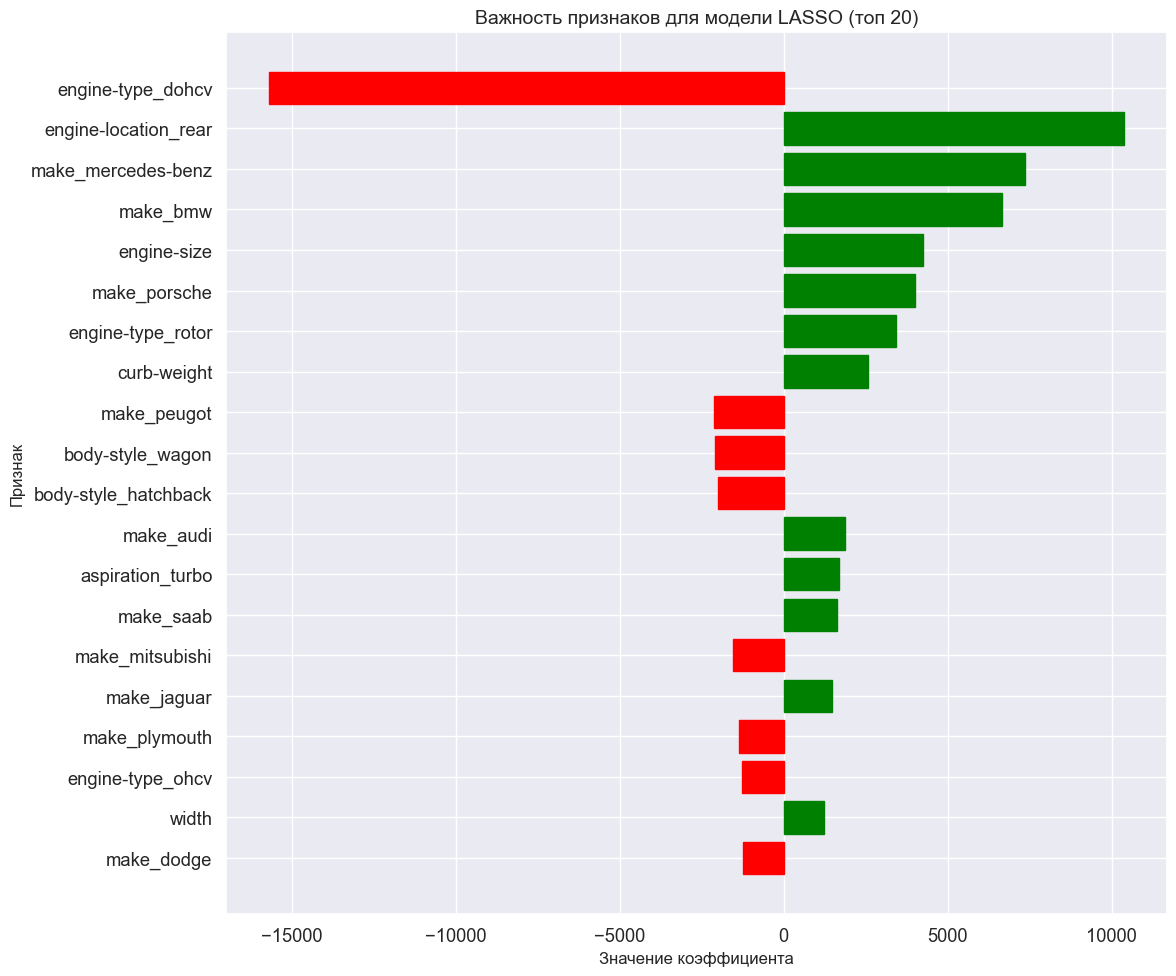

In [51]:
# Функция для построения графика важности коэффициентов с большим количеством признаков
def plot_feature_importance_large(model, feature_names, model_name, top_n=20):
    # Создаем датафрейм с коэффициентами
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
    
    # Сортируем по абсолютному значению коэффициентов
    coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
    coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
    
    # Берем top_n признаков с наибольшими абсолютными значениями коэффициентов
    coef_df = coef_df.head(top_n)
    
    # Сортируем для отображения на графике (сверху вниз по убыванию)
    coef_df = coef_df.sort_values('Abs_Coefficient', ascending=True)
    
    # Строим горизонтальную столбчатую диаграмму
    plt.figure(figsize=(12, 10))
    bars = plt.barh(coef_df['Feature'], coef_df['Coefficient'])
    
    # Добавляем цвета в зависимости от знака коэффициента
    for i, bar in enumerate(bars):
        if coef_df['Coefficient'].iloc[i] < 0:
            bar.set_color('red')
        else:
            bar.set_color('green')
    
    plt.title(f'Важность признаков для модели {model_name} (топ {top_n})', fontsize=14)
    plt.xlabel('Значение коэффициента', fontsize=12)
    plt.ylabel('Признак', fontsize=12)
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# Строим график важности коэффициентов для лучшей модели
if len(best_features) > 20:
    plot_feature_importance_large(best_model, best_features, "LASSO")
else:
    plot_feature_importance(best_model, best_features, "LASSO")

### 6.6 Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`

In [ ]:
# Определяем количество признаков для отбора
n_features_to_select = len(best_features) // 2

# Создаем объект RFE
rfe = RFE(estimator=best_model, n_features_to_select=n_features_to_select, step=1)

# Обучаем RFE
rfe.fit(X_train_processed, y_train)

# Получаем маску отобранных признаков
selected_features_mask = rfe.support_

# Получаем имена отобранных признаков
selected_features = np.array(best_features)[selected_features_mask]

print(f"Количество отобранных признаков: {len(selected_features)}")
print("Отобранные признаки:")
print(selected_features)

Количество отобранных признаков: 30
Отобранные признаки:
['stroke' 'bore' 'engine-size' 'num-of-cylinders' 'curb-weight' 'width'
 'length' 'engine-type_dohcv' 'engine-type_l' 'engine-type_ohcv'
 'engine-type_rotor' 'engine-location_rear' 'drive-wheels_rwd'
 'body-style_hardtop' 'body-style_hatchback' 'body-style_sedan'
 'body-style_wagon' 'aspiration_turbo' 'make_audi' 'make_bmw'
 'make_jaguar' 'make_mercedes-benz' 'make_mitsubishi' 'make_peugot'
 'make_plymouth' 'make_porsche' 'make_saab' 'make_subaru' 'make_toyota'
 'make_volvo']


In [67]:
# Обучаем модель на отобранных признаках

rfe_model = Lasso(alpha=best_model.alpha, random_state=42, max_iter=10000)

# Выбираем только отобранные признаки из обучающей и тестовой выборок
X_train_rfe = X_train_processed[:, selected_features_mask]
X_test_rfe = X_test_processed[:, selected_features_mask]

# Обучаем модель
rfe_model.fit(X_train_rfe, y_train)

# Делаем предсказания
y_pred_rfe = rfe_model.predict(X_test_rfe)

### 6.7 Построить график (`barh`) с важностью коэфициентов при соответствующих признаках

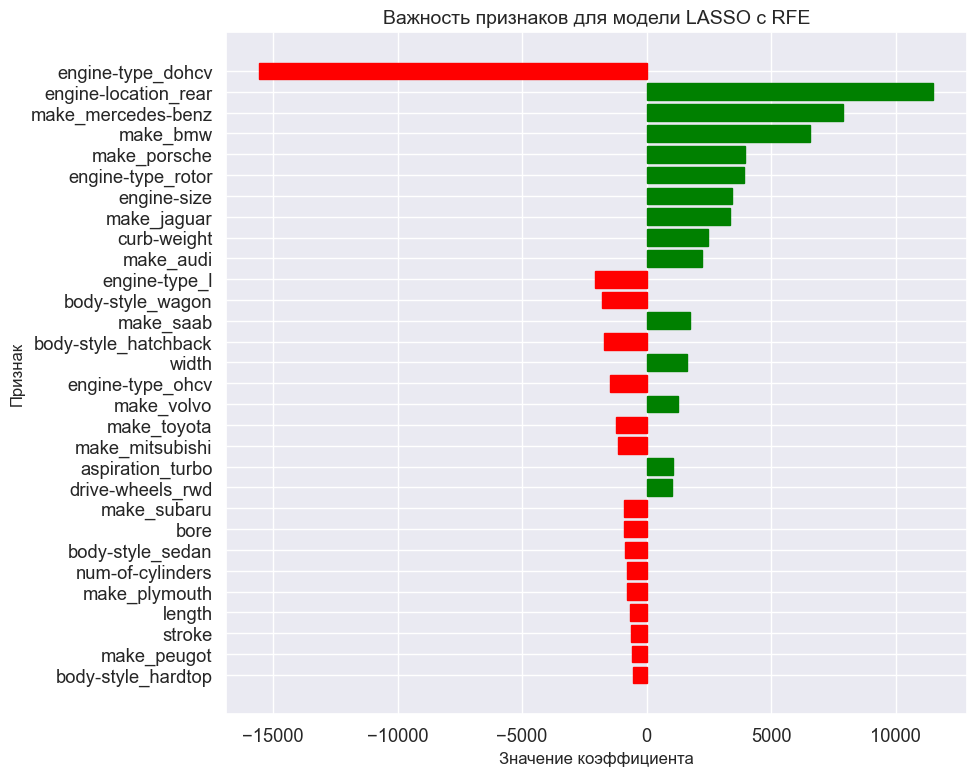

In [68]:
# Строим график важности коэффициентов для модели с отобранными признаками
plot_feature_importance(rfe_model, selected_features, "LASSO с RFE")

### 6.8 Вывести значения метрик на тестовом наборе

In [69]:
# Вычисляем метрики для модели с отобранными признаками
rfe_metrics = evaluate_model(y_test, y_pred_rfe, "LASSO с RFE")

Метрики для модели LASSO с RFE:
MSE: 11425004.02
MAE: 2345.25
R^2: 0.8544


## 7. Сделать вывод

### 7.1 Лучший регрессор, обученный на данных без категориальных признаков

In [59]:
# Выводим информацию о лучшем регрессоре без категориальных признаков
print(f"Метрики на тестовом наборе:")
print(f"MSE: {metrics_comparison.loc[2, 'MSE (без кат.)']:.2f}")
print(f"MAE: {metrics_comparison.loc[2, 'MAE (без кат.)']:.2f}")
print(f"R^2: {metrics_comparison.loc[2, 'R^2 (без кат.)']:.4f}")

Метрики на тестовом наборе:
MSE: 15331818.10
MAE: 2767.87
R^2: 0.8045


### 7.2 Лучший регрессор, обученный на данных с категориальными признаками

In [60]:
# Выводим информацию о лучшем регрессоре с категориальными признаками
print(f"Метрики на тестовом наборе:")
print(f"MSE: {metrics_comparison.loc[2, 'MSE (с кат.)']:.2f}")
print(f"MAE: {metrics_comparison.loc[2, 'MAE (с кат.)']:.2f}")
print(f"R^2: {metrics_comparison.loc[2, 'R^2 (с кат.)']:.4f}")

Метрики на тестовом наборе:
MSE: 9965599.89
MAE: 2207.04
R^2: 0.8730


### 7.3 Вывод о результатах использования `Recursive Feature Elimination`

MSE до RFE: 9 965 599.89 \
MSE после RFE: 11 425 004.02 \
MAE до RFE: 2 207.04 \
MAE после RFE: 2 345.25 \
R^2 до RFE: 0.8730 \
R^2 после RFE: 0.8544 

Вывод: Использование Recursive Feature Elimination ухудшило качество модели.\
Количество признаков уменьшилось с 60 до 30, при этом все метрики ухудшились.